In [3]:
!pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)


In [4]:
import os
import sqlite3
import pandas as pd

# Step 1: Extract files and load data into SQLite
unzip_dir = 'C:/Users/JahangirBaigAVK/Downloads/Partitioned LCL Data/Small LCL Data'

# List the files to confirm extraction
extracted_files = os.listdir(unzip_dir)
print("Files in the unzipped folder:", extracted_files)

# Connect to SQLite database
db_path = 'C:/Users/JahangirBaigAVK/OneDrive - AVK/Desktop/ECP/myenv/lcl_data.db'
conn = sqlite3.connect(db_path)

# Create a cursor to interact with the database
cursor = conn.cursor()

# Loop through the CSV files and store each in SQLite
for file in extracted_files:
    if file.endswith('.csv'):
        file_path = os.path.join(unzip_dir, file)
        
        # Read CSV into pandas dataframe
        df = pd.read_csv(file_path)
        
        # Write dataframe to SQLite (use a table name based on the file name)
        table_name = file.replace('.csv', '').replace(' ', '_')  # Clean up table name
        df.to_sql(table_name, conn, if_exists='replace', index=False)
        print(f"Loaded {file} into database table {table_name}")

# Commit and close the SQLite connection
conn.commit()
conn.close()

Files in the unzipped folder: ['LCL-June2015v2_0.csv', 'LCL-June2015v2_1.csv', 'LCL-June2015v2_10.csv', 'LCL-June2015v2_100.csv', 'LCL-June2015v2_101.csv', 'LCL-June2015v2_102.csv', 'LCL-June2015v2_103.csv', 'LCL-June2015v2_104.csv', 'LCL-June2015v2_105.csv', 'LCL-June2015v2_106.csv', 'LCL-June2015v2_107.csv', 'LCL-June2015v2_108.csv', 'LCL-June2015v2_109.csv', 'LCL-June2015v2_11.csv', 'LCL-June2015v2_110.csv', 'LCL-June2015v2_111.csv', 'LCL-June2015v2_112.csv', 'LCL-June2015v2_113.csv', 'LCL-June2015v2_114.csv', 'LCL-June2015v2_115.csv', 'LCL-June2015v2_116.csv', 'LCL-June2015v2_117.csv', 'LCL-June2015v2_118.csv', 'LCL-June2015v2_119.csv', 'LCL-June2015v2_12.csv', 'LCL-June2015v2_120.csv', 'LCL-June2015v2_121.csv', 'LCL-June2015v2_122.csv', 'LCL-June2015v2_123.csv', 'LCL-June2015v2_124.csv', 'LCL-June2015v2_125.csv', 'LCL-June2015v2_126.csv', 'LCL-June2015v2_127.csv', 'LCL-June2015v2_128.csv', 'LCL-June2015v2_129.csv', 'LCL-June2015v2_13.csv', 'LCL-June2015v2_130.csv', 'LCL-June2015v2

In [6]:
conn = sqlite3.connect(db_path)
table_names = conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
table_names = [table[0] for table in table_names]
print("Tables in database:", table_names)

Tables in database: ['LCL-June2015v2_0', 'LCL-June2015v2_1', 'LCL-June2015v2_10', 'LCL-June2015v2_100', 'LCL-June2015v2_101', 'LCL-June2015v2_102', 'LCL-June2015v2_103', 'LCL-June2015v2_104', 'LCL-June2015v2_105', 'LCL-June2015v2_106', 'LCL-June2015v2_107', 'LCL-June2015v2_108', 'LCL-June2015v2_109', 'LCL-June2015v2_11', 'LCL-June2015v2_110', 'LCL-June2015v2_111', 'LCL-June2015v2_112', 'LCL-June2015v2_113', 'LCL-June2015v2_114', 'LCL-June2015v2_115', 'LCL-June2015v2_116', 'LCL-June2015v2_117', 'LCL-June2015v2_118', 'LCL-June2015v2_119', 'LCL-June2015v2_12', 'LCL-June2015v2_120', 'LCL-June2015v2_121', 'LCL-June2015v2_122', 'LCL-June2015v2_123', 'LCL-June2015v2_124', 'LCL-June2015v2_125', 'LCL-June2015v2_126', 'LCL-June2015v2_127', 'LCL-June2015v2_128', 'LCL-June2015v2_129', 'LCL-June2015v2_13', 'LCL-June2015v2_130', 'LCL-June2015v2_131', 'LCL-June2015v2_132', 'LCL-June2015v2_133', 'LCL-June2015v2_134', 'LCL-June2015v2_135', 'LCL-June2015v2_136', 'LCL-June2015v2_137', 'LCL-June2015v2_138

In [7]:
# Function to query data by year
def query_by_year(year):
    conn = sqlite3.connect(db_path)
    dfs = []
    for table in table_names:
        # Escape the table name with double quotes
        query = f"""
        SELECT * FROM "{table}"
        WHERE strftime('%Y', DateTime) = '{year}'
        """
        try:
            dfs.append(pd.read_sql(query, conn))
        except Exception as e:
            print(f"Error querying table {table}: {e}")
    conn.close()
    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        return pd.DataFrame()  # Return empty DataFrame if no data is found

# Example: Query data for 2011
df_2011 = query_by_year('2011')
print("Data for 2011:", df_2011.head())

# Query data for other years
df_2012 = query_by_year('2012')
print("Data for 2012:", df_2012.head())

df_2013 = query_by_year('2013')
print("Data for 2013:", df_2013.head())

df_2014 = query_by_year('2014')
print("Data for 2014:", df_2014.head())

Data for 2011:        LCLid stdorToU                     DateTime KWH/hh (per half hour) 
0  MAC000016      Std  2011-12-06 13:00:00.0000000                  0.105 
1  MAC000016      Std  2011-12-06 13:30:00.0000000                  0.134 
2  MAC000016      Std  2011-12-06 14:00:00.0000000                  0.141 
3  MAC000016      Std  2011-12-06 14:30:00.0000000                   0.13 
4  MAC000016      Std  2011-12-06 15:00:00.0000000                  0.149 
Data for 2012:        LCLid stdorToU                     DateTime KWH/hh (per half hour) 
0  MAC000002      Std  2012-10-12 00:30:00.0000000                      0 
1  MAC000002      Std  2012-10-12 01:00:00.0000000                      0 
2  MAC000002      Std  2012-10-12 01:30:00.0000000                      0 
3  MAC000002      Std  2012-10-12 02:00:00.0000000                      0 
4  MAC000002      Std  2012-10-12 02:30:00.0000000                      0 
Data for 2013:        LCLid stdorToU                     DateTime KWH/

In [11]:
pip install pyarrow


   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
    --------------------------------------- 0.5/25.1 MB 2.6 MB/s eta 0:00:10
   - -------------------------------------- 1.0/25.1 MB 2.8 MB/s eta 0:00:09
   --- ------------------------------------ 2.1/25.1 MB 3.6 MB/s eta 0:00:07
   ---- ----------------------------------- 2.6/25.1 MB 3.5 MB/s eta 0:00:07
   ------ --------------------------------- 3.9/25.1 MB 4.0 MB/s eta 0:00:06
   ---------- ----------------------------- 6.3/25.1 MB 5.2 MB/s eta 0:00:04
   --------------------- ------------------ 13.6/25.1 MB 9.8 MB/s eta 0:00:02
   ------------------------------ --------- 19.1/25.1 MB 12.4 MB/s eta 0:00:01
   ------------------------------- -------- 19.9/25.1 MB 11.5 MB/s eta 0:00:01
   -------------------------------- ------- 20.2/25.1 MB 11.2 MB/s eta 0:00:01
   -------------------------------- ------- 20.4/25.1 MB 9.7 MB/s eta 0:00:01
   --------------------------------- ------ 20.7/25.1 MB 8.8 MB/s eta 0:00

In [12]:
df_2011.to_feather('2011_data.feather')

In [21]:
df_2012.to_feather('2012_data.feather')
df_2013.to_feather('2013_data.feather')

In [23]:
df_2014.to_feather('2014_data.feather')

In [3]:
import pandas as pd
df_2012=pd.read_feather('2012_data.feather')
df_2012.head(10)

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
5,MAC000002,Std,2012-10-12 03:00:00.0000000,0
6,MAC000002,Std,2012-10-12 03:30:00.0000000,0
7,MAC000002,Std,2012-10-12 04:00:00.0000000,0
8,MAC000002,Std,2012-10-12 04:30:00.0000000,0
9,MAC000002,Std,2012-10-12 05:00:00.0000000,0


In [94]:
# Ensure 'DateTime' column exists and is properly formatted
df_2012['DateTime'] = pd.to_datetime(df_2012['DateTime'])

# Set the datetime column as the index
df_2012.set_index('DateTime', inplace=True)
df_2012['KWH/hh (per half hour) '] = df_2012['KWH/hh (per half hour) '].interpolate(method='time')

In [95]:
df_2013['DateTime'] = pd.to_datetime(df_2013['DateTime'])

# Set the datetime column as the index
df_2013.set_index('DateTime', inplace=True)
df_2013['KWH/hh (per half hour) '] = df_2013['KWH/hh (per half hour) '].interpolate(method='time')

In [97]:
df_2012['KWH/hh (per half hour) '].isna().sum()

np.int64(0)

In [4]:
df_2013=pd.read_feather('2013_data.feather')
df_2013.head(10)

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2013-01-01 00:00:00.0000000,0.219
1,MAC000002,Std,2013-01-01 00:30:00.0000000,0.241
2,MAC000002,Std,2013-01-01 01:00:00.0000000,0.191
3,MAC000002,Std,2013-01-01 01:30:00.0000000,0.235
4,MAC000002,Std,2013-01-01 02:00:00.0000000,0.182
5,MAC000002,Std,2013-01-01 02:30:00.0000000,0.229
6,MAC000002,Std,2013-01-01 03:00:00.0000000,0.194
7,MAC000002,Std,2013-01-01 03:30:00.0000000,0.201
8,MAC000002,Std,2013-01-01 04:00:00.0000000,0.122
9,MAC000002,Std,2013-01-01 04:30:00.0000000,0.099


In [5]:
df_2014=pd.read_feather('2014_data.feather')
df_2014.head(10)

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2014-01-01 00:00:00.0000000,0.496
1,MAC000002,Std,2014-01-01 00:30:00.0000000,0.427
2,MAC000002,Std,2014-01-01 01:00:00.0000000,0.469
3,MAC000002,Std,2014-01-01 01:30:00.0000000,0.362
4,MAC000002,Std,2014-01-01 02:00:00.0000000,0.452
5,MAC000002,Std,2014-01-01 02:30:00.0000000,0.232
6,MAC000002,Std,2014-01-01 03:00:00.0000000,0.102
7,MAC000002,Std,2014-01-01 03:30:00.0000000,0.121
8,MAC000002,Std,2014-01-01 04:00:00.0000000,0.085
9,MAC000002,Std,2014-01-01 04:30:00.0000000,0.128


In [12]:
df_2011=pd.read_feather('2011_data.feather')
df_2011.head(10)

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000016,Std,2011-12-06 13:00:00.0000000,0.105
1,MAC000016,Std,2011-12-06 13:30:00.0000000,0.134
2,MAC000016,Std,2011-12-06 14:00:00.0000000,0.141
3,MAC000016,Std,2011-12-06 14:30:00.0000000,0.13
4,MAC000016,Std,2011-12-06 15:00:00.0000000,0.149
5,MAC000016,Std,2011-12-06 15:30:00.0000000,0.131
6,MAC000016,Std,2011-12-06 16:00:00.0000000,0.133
7,MAC000016,Std,2011-12-06 16:30:00.0000000,0.148
8,MAC000016,Std,2011-12-06 17:00:00.0000000,0.128
9,MAC000016,Std,2011-12-06 17:30:00.0000000,0.128


## Initial Data Inspection

In [13]:
print(df_2011.shape, df_2011.info(), df_2011.describe())
print(df_2012.shape, df_2012.info(), df_2012.describe())
print(df_2013.shape, df_2013.info(), df_2013.describe())
print(df_2014.shape, df_2014.info(), df_2014.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399740 entries, 0 to 399739
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   LCLid                    399740 non-null  object
 1   stdorToU                 399740 non-null  object
 2   DateTime                 399740 non-null  object
 3   KWH/hh (per half hour)   399740 non-null  object
dtypes: object(4)
memory usage: 12.2+ MB
(399740, 4) None             LCLid stdorToU                     DateTime  \
count      399740   399740                       399740   
unique        411        2                         1854   
top     MAC000145      Std  2011-12-15 00:00:00.0000000   
freq         1855   338964                          464   

       KWH/hh (per half hour)   
count                   399740  
unique                    2969  
top                         0   
freq                      5204  
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [14]:
#Lets change the column types for EDA
#changing datetime column from object to datetime
df_2011['DateTime']=pd.to_datetime(df_2011['DateTime'])
df_2012['DateTime']=pd.to_datetime(df_2012['DateTime'])
df_2013['DateTime']=pd.to_datetime(df_2013['DateTime'])
df_2014['DateTime']=pd.to_datetime(df_2014['DateTime'])

In [19]:
#Change KWH/hh (per half hour) column type from object to numeric
df_2011['KWH/hh (per half hour) ']=pd.to_numeric(df_2011['KWH/hh (per half hour) '], errors='coerce')
df_2012['KWH/hh (per half hour) ']=pd.to_numeric(df_2012['KWH/hh (per half hour) '], errors='coerce')
df_2013['KWH/hh (per half hour) ']=pd.to_numeric(df_2013['KWH/hh (per half hour) '], errors='coerce')
df_2014['KWH/hh (per half hour) ']=pd.to_numeric(df_2014['KWH/hh (per half hour) '], errors='coerce')

In [21]:
df_2011['LCLid']=df_2011['LCLid'].astype('category')
df_2012['LCLid']=df_2012['LCLid'].astype('category')
df_2013['LCLid']=df_2013['LCLid'].astype('category')
df_2014['LCLid']=df_2014['LCLid'].astype('category')

In [22]:
df_2011['stdorToU']=df_2011['stdorToU'].astype('category')
df_2012['stdorToU']=df_2012['stdorToU'].astype('category')
df_2013['stdorToU']=df_2013['stdorToU'].astype('category')
df_2014['stdorToU']=df_2014['stdorToU'].astype('category')

In [26]:
# Lets check for Missing Values

df_2011.isnull().sum()
df_2012.isnull().sum()
df_2013.isnull().sum()
df_2014.isnull().sum()

LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64

In [22]:
df_2012.head()

,LCLid,stdorToU,KWH/hh (per half hour),Month_Year,Hour,Weekday,Month,Rank_x,Weekend,Season,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_10,Rank_y,Rolling_Std_3,Rolling_Std_10
0,MAC000002,Std,0.0,2012-10,3,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,0.0,0.0
1,MAC000002,Std,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,0.0,0.0
2,MAC000002,Std,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,0.0,0.0
3,MAC000002,Std,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,0.0,0.0
4,MAC000002,Std,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,0.0,0.0


## Exploratory Data Analysis

In [121]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


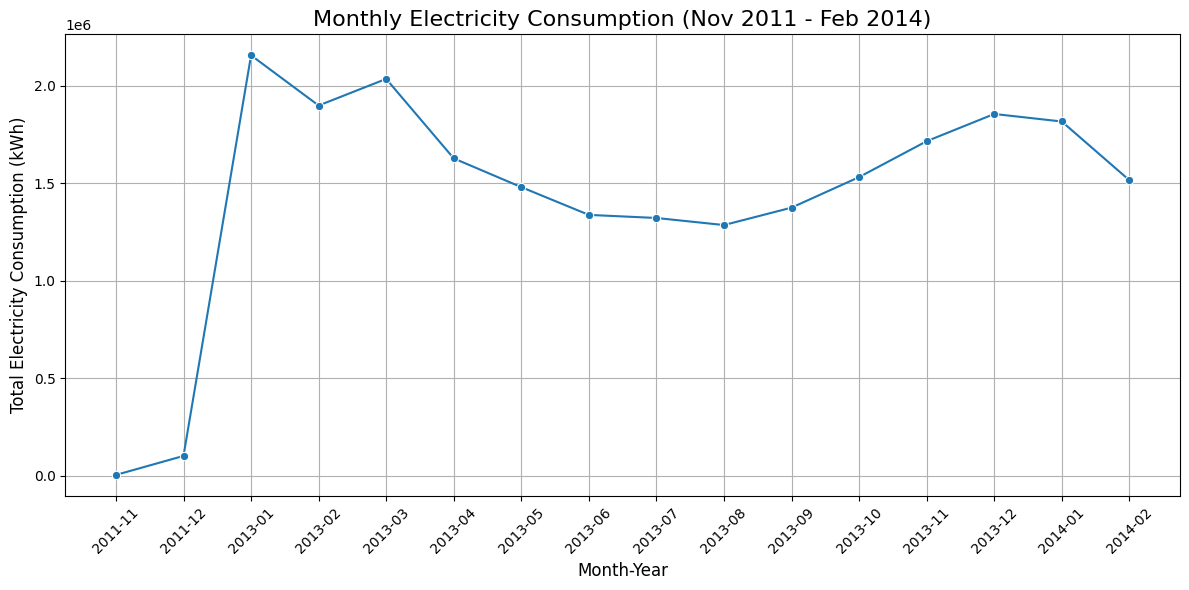

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all DataFrames as before, ensuring all preprocessing is correct
df_2011['DateTime'] = pd.to_datetime(df_2011['DateTime'])
df_2012['DateTime'] = pd.to_datetime(df_2012['DateTime'])
df_2013['DateTime'] = pd.to_datetime(df_2013['DateTime'])
df_2014['DateTime'] = pd.to_datetime(df_2014['DateTime'])

df_2011['Month_Year'] = df_2011['DateTime'].dt.to_period('M')
df_2012['Month_Year'] = df_2012['DateTime'].dt.to_period('M')
df_2013['Month_Year'] = df_2013['DateTime'].dt.to_period('M')
df_2014['Month_Year'] = df_2014['DateTime'].dt.to_period('M')

monthly_2011 = df_2011.groupby('Month_Year')['KWH/hh (per half hour) '].sum()
monthly_2012 = df_2012.groupby('Month_Year')['KWH/hh (per half hour) '].sum()
monthly_2013 = df_2013.groupby('Month_Year')['KWH/hh (per half hour) '].sum()
monthly_2014 = df_2014.groupby('Month_Year')['KWH/hh (per half hour) '].sum()

monthly_combined = pd.concat([monthly_2011, monthly_2012, monthly_2013, monthly_2014], axis=0)

# Reset index to prepare for plotting
monthly_combined = monthly_combined.reset_index()
monthly_combined.columns = ['Month_Year', 'Total_KWH']

# Convert 'Month_Year' to string for compatibility with seaborn
monthly_combined['Month_Year'] = monthly_combined['Month_Year'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_combined, x='Month_Year', y='Total_KWH', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Electricity Consumption (Nov 2011 - Feb 2014)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Electricity Consumption (kWh)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
df_2012=pd.read_feather('2012_data.feather')
df_2013=pd.read_feather('2013_data.feather')

In [50]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------------ --------------------- 4.5/9.8 MB 22.3 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 20.7 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 20.7 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 10.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ----- ---------------------------------- 6.0/44.5 MB 28.2 MB/s eta 0:00:02
   -------- ------------------------------- 9.2/44.5 MB 21.6 MB/s eta 0:00:02
   ---------- ----------------------------- 11.8/44.5 MB 19.5 MB/s eta 0:00:02
   ------------- -------------------------- 15.2/44.5 MB 18.0 MB/s eta 0:00:02
   ---------------- ----------------------- 18.1/44.5 MB 17.5 MB/s eta 0:00:02
   ------------------- -------------------- 21.2/44.5 MB 17.0 MB/s eta 0:00:02
   -

In [9]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60410060 entries, 0 to 60410059
Data columns (total 5 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   LCLid                    category      
 1   stdorToU                 category      
 2   DateTime                 datetime64[ns]
 3   KWH/hh (per half hour)   object        
 4   Month_Year               period[M]     
dtypes: category(2), datetime64[ns](1), object(1), period[M](1)
memory usage: 1.5+ GB


In [10]:
# Ensure 'DateTime' column is in datetime format
df_2012['DateTime'] = pd.to_datetime(df_2012['DateTime'])

# Extract Hour, Weekday, and Month directly from the 'DateTime' column
df_2012['Hour'] = df_2012['DateTime'].dt.hour
df_2012['Weekday'] = df_2012['DateTime'].dt.weekday
df_2012['Month'] = df_2012['DateTime'].dt.month

In [11]:
df_2012.to_feather('df_2012.feather')

In [12]:
# Ensure 'DateTime' column is in datetime format
df_2013['DateTime'] = pd.to_datetime(df_2013['DateTime'])

# Extract Hour, Weekday, and Month directly from the 'DateTime' column
df_2013['Hour'] = df_2013['DateTime'].dt.hour
df_2013['Weekday'] = df_2013['DateTime'].dt.weekday
df_2013['Month'] = df_2013['DateTime'].dt.month

C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_38284\2065398852.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2012, x='Hour', y='KWH/hh (per half hour) ', palette='viridis')


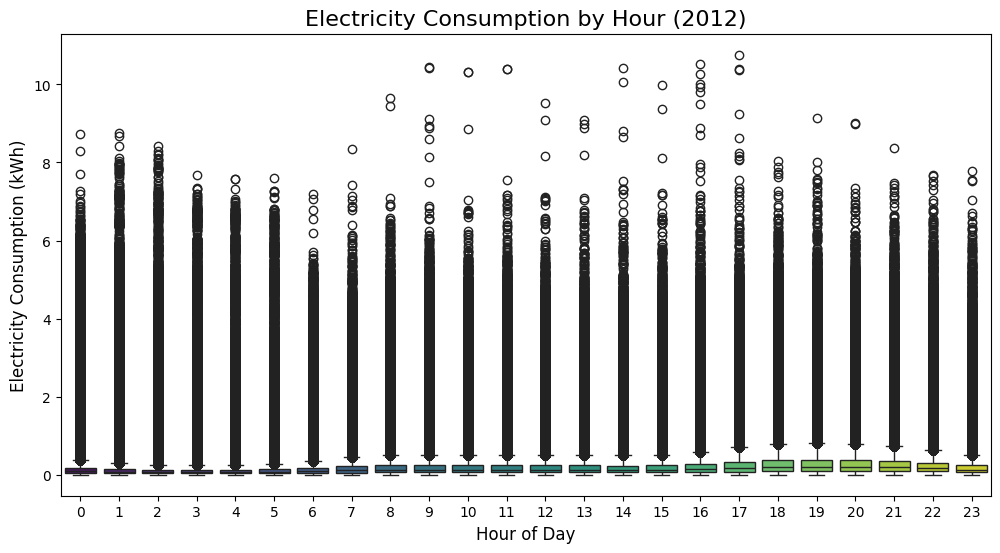

In [76]:
# Lets explore corelations on time based features (hour, weekday, month)
# Derive time features
df_2012['Hour'] = df_2012.index.hour
df_2012['Weekday'] = df_2012.index.weekday
df_2012['Month'] = df_2012.index.month

#plot to see usage by hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2012, x='Hour', y='KWH/hh (per half hour) ', palette='viridis')
plt.title('Electricity Consumption by Hour (2012)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.show()


C:\Users\JahangirBaigAVK\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


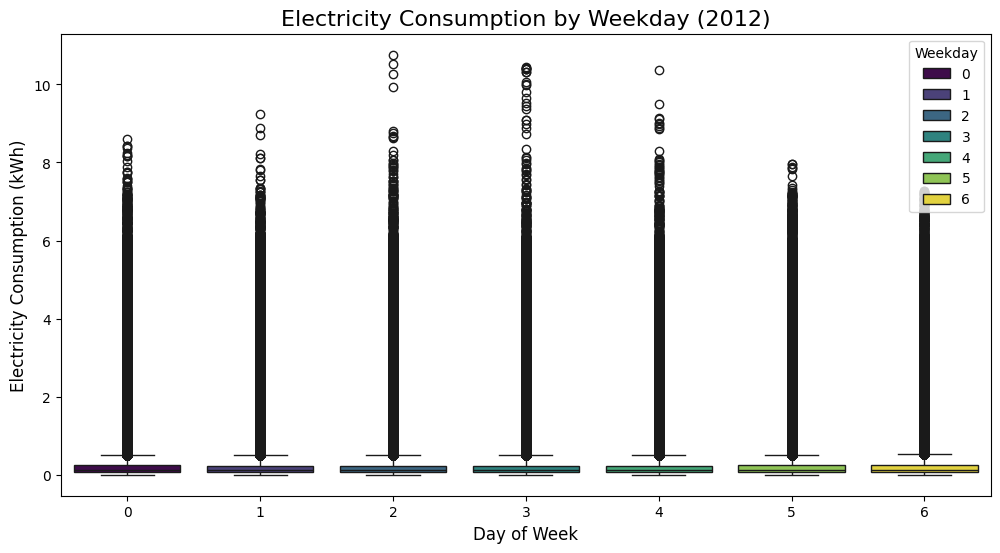

In [82]:

# Boxplot to see usage by Weekday
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2012, x='Weekday', y='KWH/hh (per half hour) ', hue='Weekday', palette='viridis')
plt.title('Electricity Consumption by Weekday (2012)', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.show()


C:\Users\JahangirBaigAVK\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


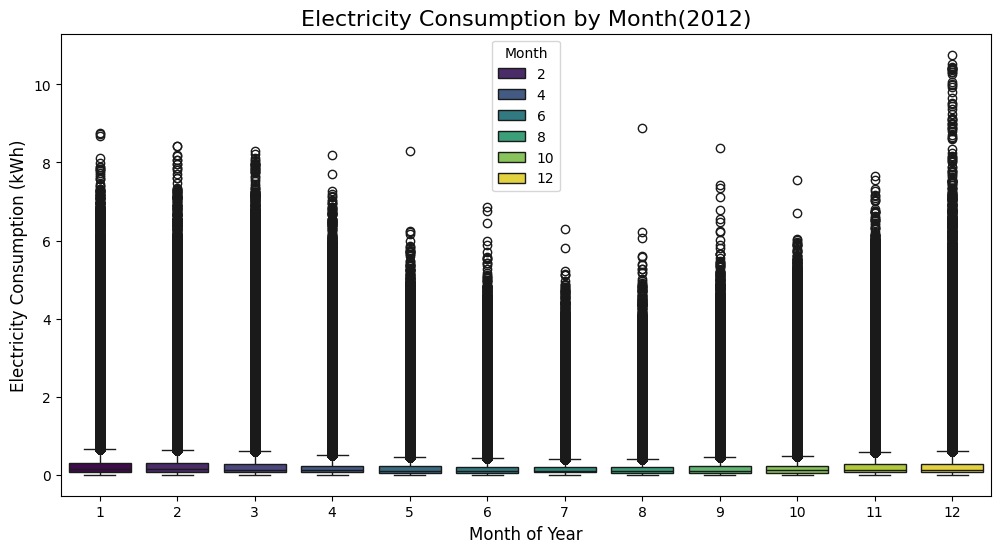

In [80]:
# Boxplot to see usage by Month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2012, x='Month', y='KWH/hh (per half hour) ', hue='Month', palette='viridis')
plt.title('Electricity Consumption by Month(2012)', fontsize=16)
plt.xlabel('Month of Year', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.show()

Number of Unique Households in year 2011: 411


C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_38284\2980555894.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  household_consumption = df_2012.groupby('LCLid')['KWH/hh (per half hour) '].sum().reset_index()


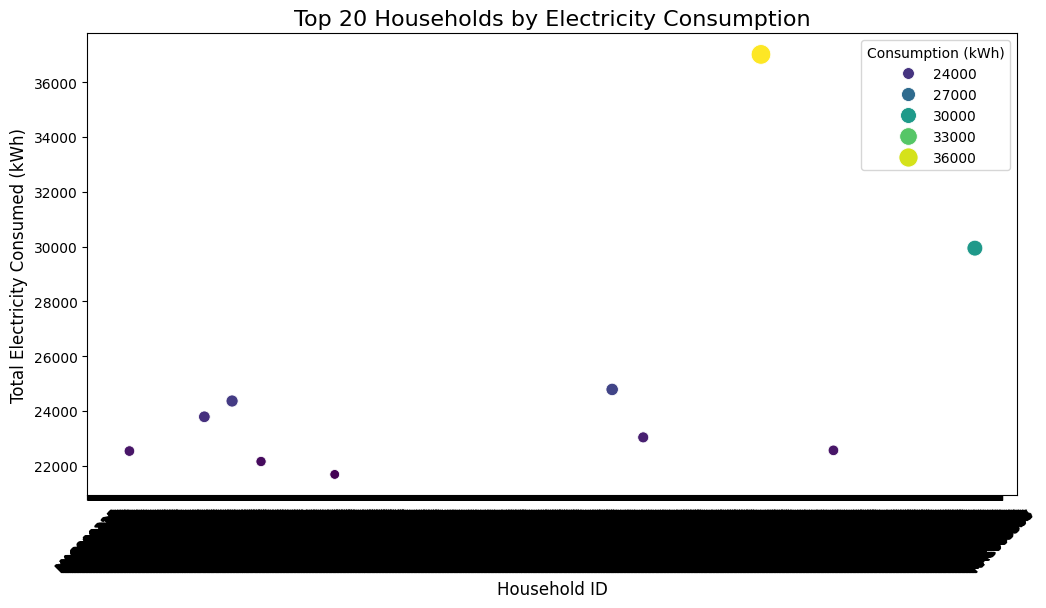

In [102]:
# Extract the number of unique households in 2011
unique_households = df_2011['LCLid'].nunique()
print(f'Number of Unique Households in year 2011: {unique_households}')

# Grouping data by households to get total consumption
household_consumption = df_2012.groupby('LCLid')['KWH/hh (per half hour) '].sum().reset_index()

# Extract the top 20 households based on consumption
top_households = household_consumption.sort_values(by='KWH/hh (per half hour) ', ascending=False).head(10)

# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_households, x='LCLid', y='KWH/hh (per half hour) ', hue='KWH/hh (per half hour) ', palette='viridis', size='KWH/hh (per half hour) ', sizes=(50, 200))

# Customize the plot
plt.title('Top 20 Households by Electricity Consumption', fontsize=16)
plt.xlabel('Household ID', fontsize=12)
plt.ylabel('Total Electricity Consumed (kWh)', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.legend(title='Consumption (kWh)')
plt.show()

Number of Unique Households in year 2012: 5552


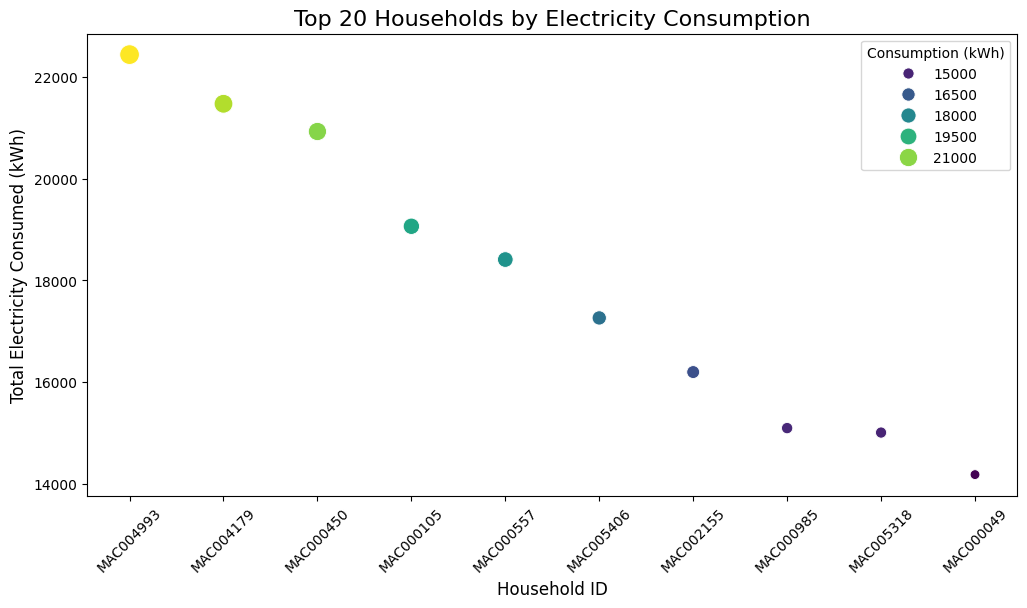

In [100]:
# Extract the number of unique households in 2012
unique_households = df_2012['LCLid'].nunique()
print(f'Number of Unique Households in year 2012: {unique_households}')

# Grouping data by households to get total consumption
household_consumption = df_2012.groupby('LCLid')['KWH/hh (per half hour) '].sum().reset_index()

# Extract the top 20 households based on consumption
top_households = household_consumption.sort_values(by='KWH/hh (per half hour) ', ascending=False).head(10)

# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_households, x='LCLid', y='KWH/hh (per half hour) ', hue='KWH/hh (per half hour) ', palette='viridis', size='KWH/hh (per half hour) ', sizes=(50, 200))
# Customize the plot
plt.title('Top 20 Households by Electricity Consumption', fontsize=16)
plt.xlabel('Household ID', fontsize=12)
plt.ylabel('Total Electricity Consumed (kWh)', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.legend(title='Consumption (kWh)')
plt.show()

In [101]:
household_consumption.head(10)

,LCLid,KWH/hh (per half hour)
0,MAC000002,978.645355
1,MAC000003,5895.793724
2,MAC000004,401.495067
3,MAC000005,950.438355
4,MAC000006,925.224723
5,MAC000007,896.837355
6,MAC000008,4241.134356
7,MAC000009,944.605355
8,MAC000010,2783.357355
9,MAC000011,1422.224987


C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_44756\2224077562.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tariff_consumption = df_2012.groupby('stdorToU')['KWH/hh (per half hour) '].sum().reset_index()
C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_44756\2224077562.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tariff_consumption, x='stdorToU', y='KWH/hh (per half hour) ', palette='mako')


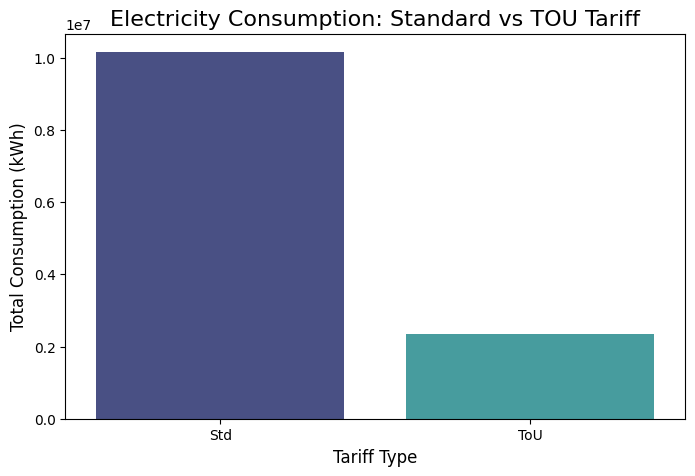

In [131]:
# Grouping by tariff type to evaluate how households behave under different tariffs
tariff_consumption = df_2012.groupby('stdorToU')['KWH/hh (per half hour) '].sum().reset_index()

# Visualize comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=tariff_consumption, x='stdorToU', y='KWH/hh (per half hour) ', palette='mako')
plt.title('Electricity Consumption: Standard vs TOU Tariff', fontsize=16)
plt.xlabel('Tariff Type', fontsize=12)
plt.ylabel('Total Consumption (kWh)', fontsize=12)
plt.show()

C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_38284\3340390276.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  household_tariff = df_2012.groupby(['LCLid', 'stdorToU'])['KWH/hh (per half hour) '].sum().reset_index()
C:\Users\JahangirBaigAVK\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


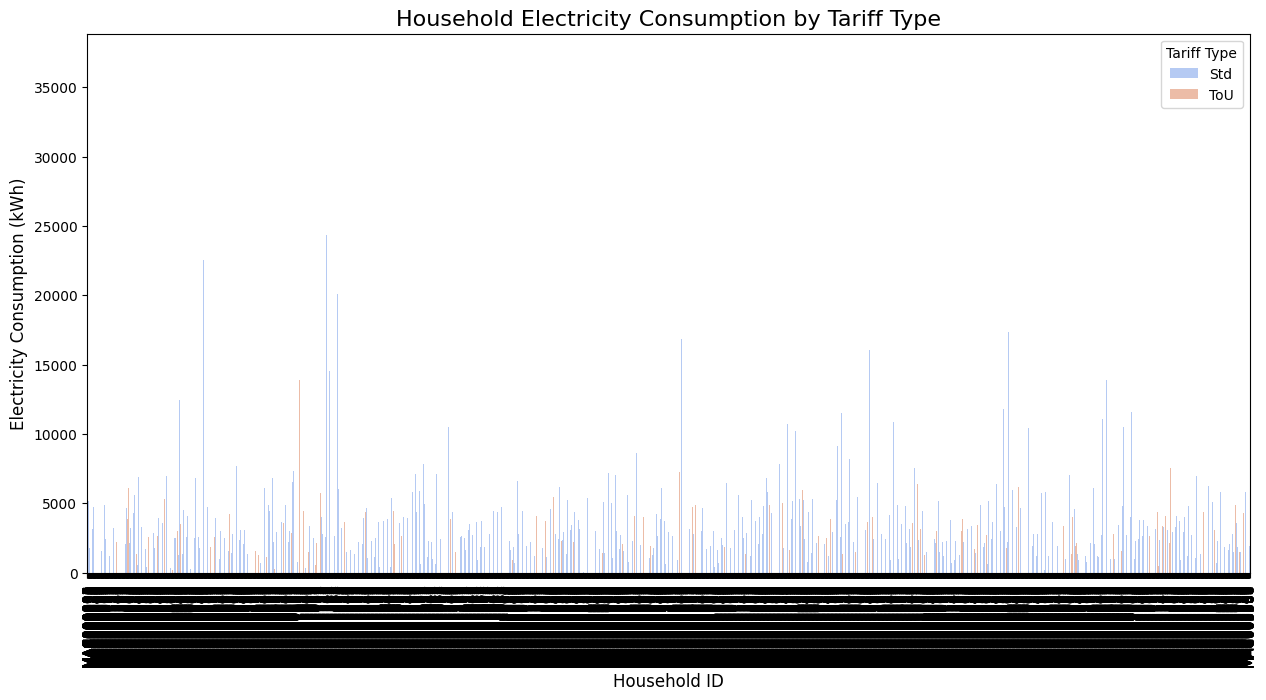

In [117]:
# Consumption by household and tariff
# Explore consumption trends at the household level, segmented by tariff types:
household_tariff = df_2012.groupby(['LCLid', 'stdorToU'])['KWH/hh (per half hour) '].sum().reset_index()

# Visualize household consumption under each tariff type
plt.figure(figsize=(15, 7))
sns.barplot(data=household_tariff, x='LCLid', y='KWH/hh (per half hour) ', hue='stdorToU', dodge=True, palette='coolwarm')
plt.title('Household Electricity Consumption by Tariff Type', fontsize=16)
plt.xlabel('Household ID', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.legend(title='Tariff Type')
plt.xticks(rotation=90)
plt.show()

C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_44756\1695538770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=selected_households, x='LCLid', y='KWH/hh (per half hour) ', palette='muted')


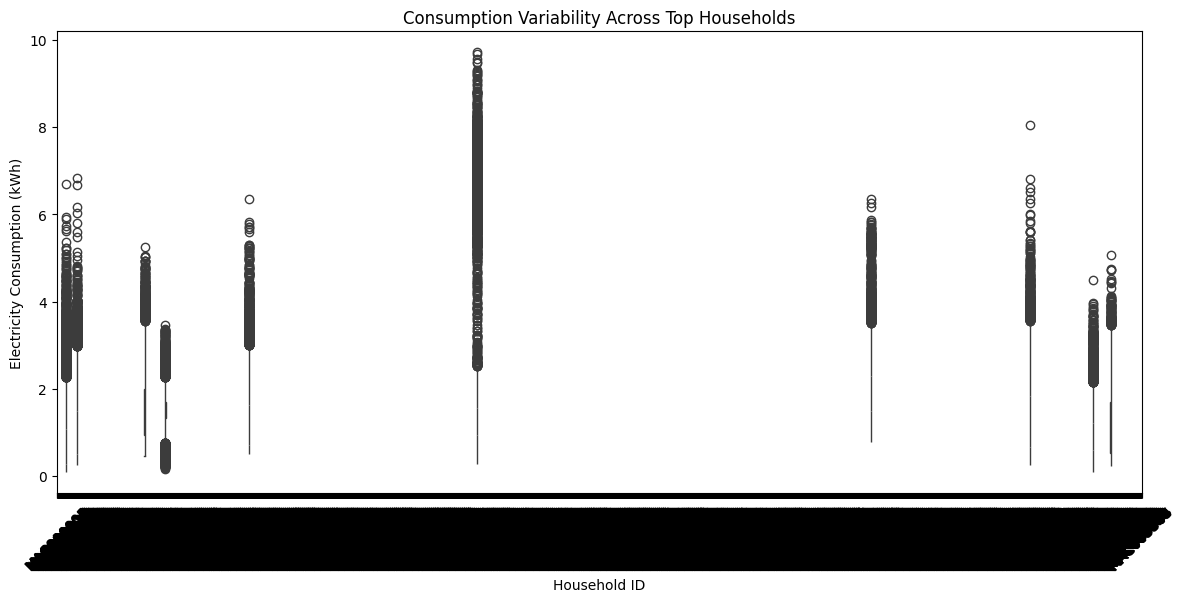

In [132]:
# Anomaly Detection 
# Plot boxplots to identify outliers for a few households
selected_households = df_2012[df_2012['LCLid'].isin(top_households['LCLid'])]
plt.figure(figsize=(14, 6))
sns.boxplot(data=selected_households, x='LCLid', y='KWH/hh (per half hour) ', palette='muted')
plt.title('Consumption Variability Across Top Households')
plt.xlabel('Household ID')
plt.ylabel('Electricity Consumption (kWh)')
plt.xticks(rotation=45)
plt.show()

#### TOU Peak Hour Savings

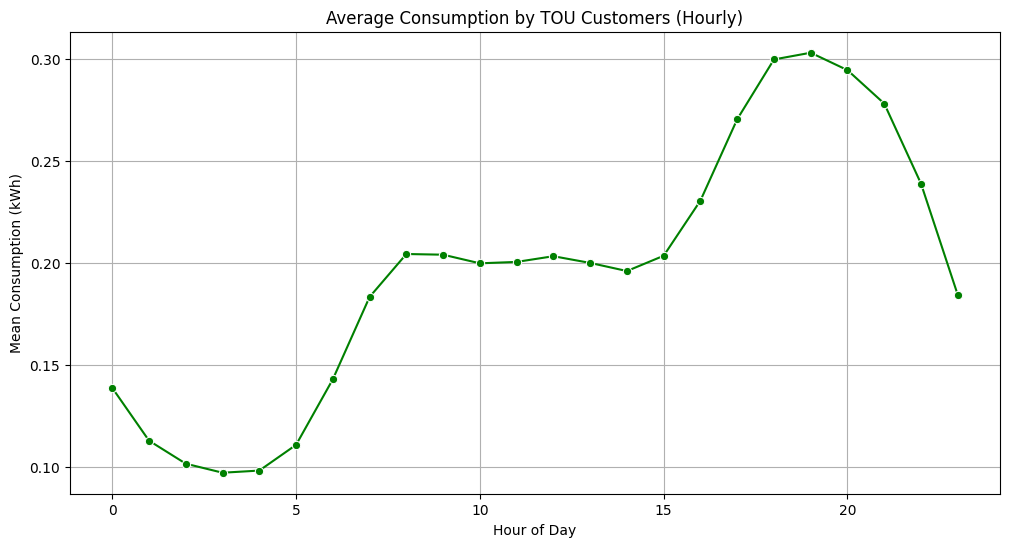

In [135]:
# Adding 'Hour' column to identify peak time
df_2012['Hour'] = pd.to_datetime(df_2012['DateTime']).dt.hour
# TOU households only
tou_data = df_2012[df_2012['stdorToU'] == 'ToU']

# Group by hour and calculate mean consumption
hourly_tou = tou_data.groupby('Hour')['KWH/hh (per half hour) '].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_tou, x='Hour', y='KWH/hh (per half hour) ', marker='o', color='green')
plt.title('Average Consumption by TOU Customers (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Consumption (kWh)')
plt.grid()
plt.show()

#### Std Peak Hour Savings

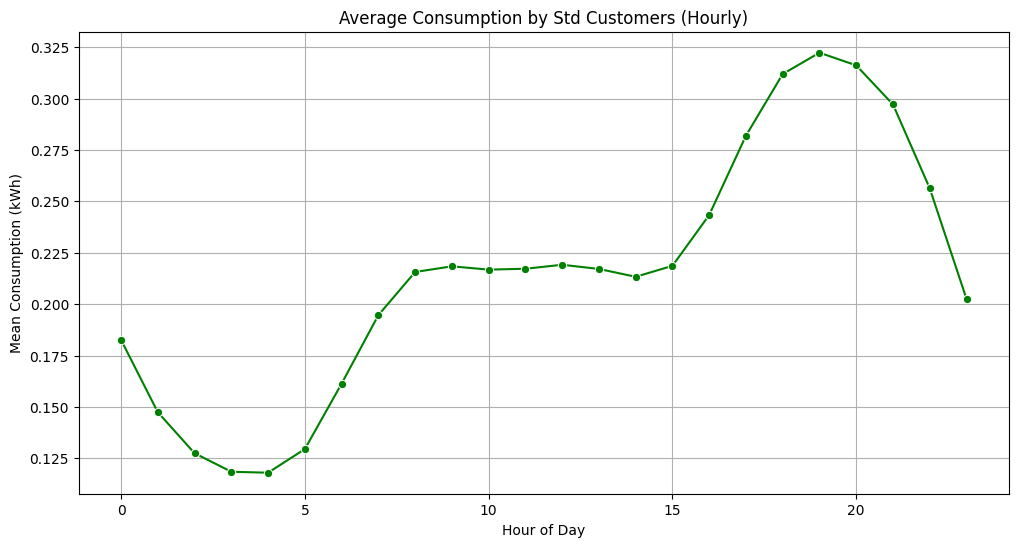

In [142]:
# Adding 'Hour' column to identify peak time
# STD households only
std_data = df_2012[df_2012['stdorToU'] == 'Std']

# Group by hour and calculate mean consumption
hourly_std = std_data.groupby('Hour')['KWH/hh (per half hour) '].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_std, x='Hour', y='KWH/hh (per half hour) ', marker='o', color='green')
plt.title('Average Consumption by Std Customers (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Consumption (kWh)')
plt.grid()
plt.show()

#### Correlation Heatmap: Identify relationships between features like time, weekday, or month with electricity consumption

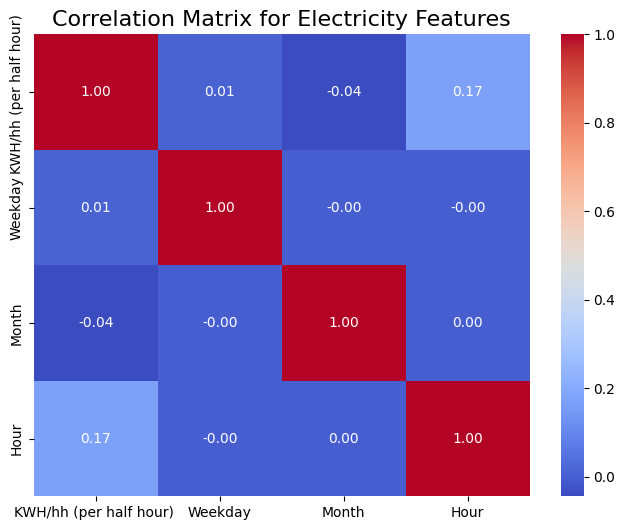

In [153]:
# Calculate correlation
numeric_columns=df_2012.select_dtypes(include=['float64', 'int64', 'int32'])
corr = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Electricity Features', fontsize=16)
plt.show()

In [154]:
df_2011.to_feather('2011_data.feather')
df_2012.to_feather('2012_data.feather')
df_2013.to_feather('2013_data.feather')
df_2014.to_feather('2014_data.feather')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

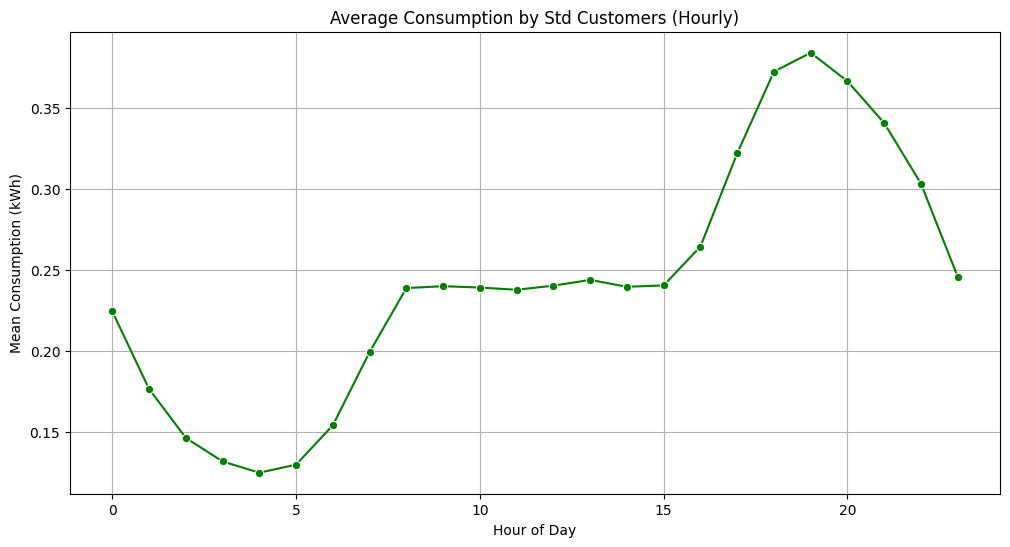

In [18]:
# Adding 'Hour' column to identify peak time
df_2013['Hour'] = pd.to_datetime(df_2013['DateTime']).dt.hour

# TOU households only
std_data = df_2013[df_2013['stdorToU'] == 'Std']

# Group by hour and calculate mean consumption
hourly_std = std_data.groupby('Hour')['KWH/hh (per half hour) '].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_std, x='Hour', y='KWH/hh (per half hour) ', marker='o', color='green')
plt.title('Average Consumption by Std Customers (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Consumption (kWh)')
plt.grid()
plt.show()

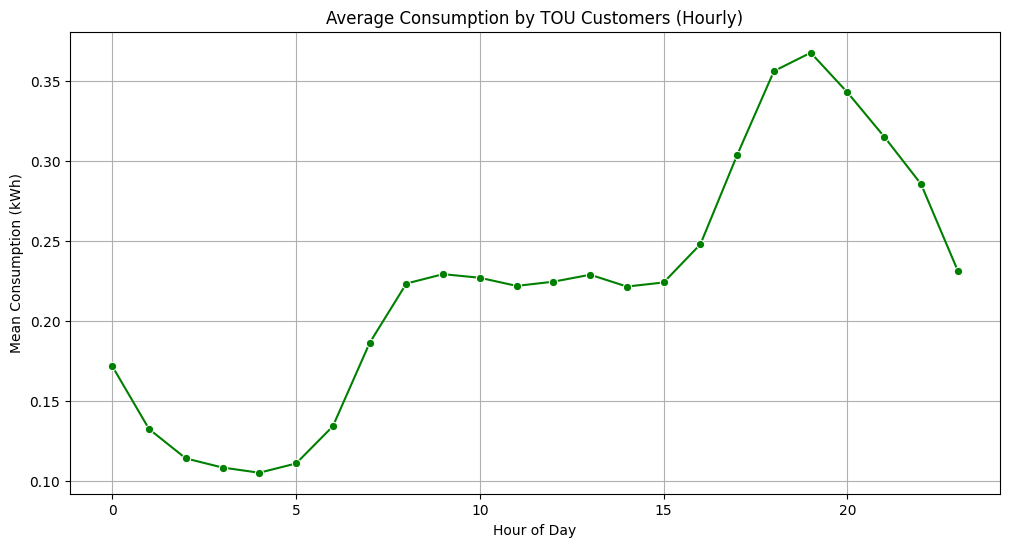

In [19]:
#Lets Analyze the peak hour savings for 2014 data as well

# Adding 'Hour' column to identify peak time
df_2014['Hour'] = pd.to_datetime(df_2014['DateTime']).dt.hour

# TOU households only
tou_data = df_2014[df_2014['stdorToU'] == 'ToU']

# Group by hour and calculate mean consumption
hourly_tou = tou_data.groupby('Hour')['KWH/hh (per half hour) '].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_tou, x='Hour', y='KWH/hh (per half hour) ', marker='o', color='green')
plt.title('Average Consumption by TOU Customers (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Consumption (kWh)')
plt.grid()
plt.show()

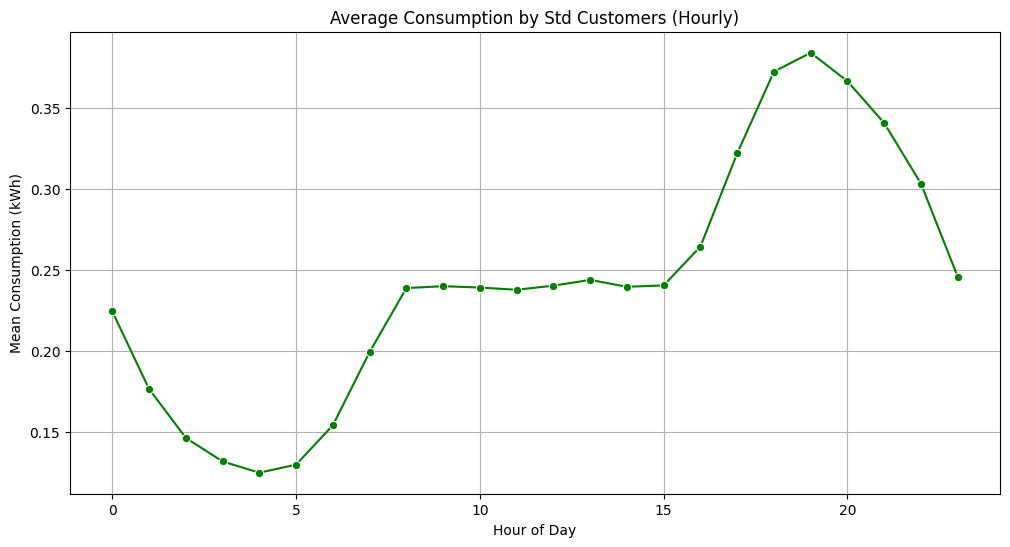

In [20]:
# Adding 'Hour' column to identify peak time
df_2014['Hour'] = pd.to_datetime(df_2014['DateTime']).dt.hour

# TOU households only
std_data = df_2014[df_2014['stdorToU'] == 'Std']

# Group by hour and calculate mean consumption
hourly_std = std_data.groupby('Hour')['KWH/hh (per half hour) '].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_std, x='Hour', y='KWH/hh (per half hour) ', marker='o', color='green')
plt.title('Average Consumption by Std Customers (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Consumption (kWh)')
plt.grid()
plt.show()

#### Now Lets Cluster the households based on their Electricity Consumption for more personalized and accurate consumption forecasts

In [14]:
df_2012.head(10)

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Month_Year,Hour,Weekday,Month
0,MAC000002,Std,2012-10-12 00:30:00,0,2012-10,0,4,10
1,MAC000002,Std,2012-10-12 01:00:00,0,2012-10,1,4,10
2,MAC000002,Std,2012-10-12 01:30:00,0,2012-10,1,4,10
3,MAC000002,Std,2012-10-12 02:00:00,0,2012-10,2,4,10
4,MAC000002,Std,2012-10-12 02:30:00,0,2012-10,2,4,10
5,MAC000002,Std,2012-10-12 03:00:00,0,2012-10,3,4,10
6,MAC000002,Std,2012-10-12 03:30:00,0,2012-10,3,4,10
7,MAC000002,Std,2012-10-12 04:00:00,0,2012-10,4,4,10
8,MAC000002,Std,2012-10-12 04:30:00,0,2012-10,4,4,10
9,MAC000002,Std,2012-10-12 05:00:00,0,2012-10,5,4,10


In [104]:
# Grouping data by households to get total consumption
household_consumption = df_2012.groupby('LCLid')['KWH/hh (per half hour) '].sum().reset_index()

# Adding column for ranking (optional)
household_consumption = household_consumption.sort_values(by='KWH/hh (per half hour) ', ascending=False)
household_consumption.reset_index(drop=True, inplace=True)
household_consumption['Rank'] = household_consumption.index + 1

# # Save data to a CSV
household_consumption.to_csv("householdconsumption_2012.csv", index=False)
print("Household consumption data saved successfully!")

# Display the first few rows
household_consumption.head(10)


Household consumption data saved successfully!


,LCLid,KWH/hh (per half hour),Rank
0,MAC004993,22437.550287,1
1,MAC004179,21471.476412,2
2,MAC000450,20926.570796,3
3,MAC000105,19064.928474,4
4,MAC000557,18410.966807,5
5,MAC005406,17264.134678,6
6,MAC002155,16200.304229,7
7,MAC000985,15099.287332,8
8,MAC005318,15011.619893,9
9,MAC000049,14185.726401,10


In [31]:
# Ensure 'KWH/hh (per half hour) ' is numeric
df_2013['KWH/hh (per half hour) '] = pd.to_numeric(df_2013['KWH/hh (per half hour) '], errors='coerce')

In [106]:
del household_consumption13

In [107]:
# Grouping data by households to get total consumption
household_consumption13 = df_2013.groupby('LCLid')['KWH/hh (per half hour) '].sum().reset_index()

# Adding column for ranking (optional)
household_consumption13 = household_consumption13.sort_values(by='KWH/hh (per half hour) ', ascending=False)
household_consumption13.reset_index(drop=True, inplace=True)
household_consumption13['Rank'] = household_consumption13.index + 1

# # Save data to a CSV
household_consumption13.to_csv("household_consumption_2013.csv", index=False)
print("Household consumption data saved successfully!")


Household consumption data saved successfully!


In [108]:
household_consumption13=pd.read_csv('household_consumption_2013.csv')
household_consumption13.head(10)

,LCLid,KWH/hh (per half hour),Rank
0,MAC004179,37016.351000,1
1,MAC005406,29945.111007,2
2,MAC003329,24787.574001,3
3,MAC001145,24365.151999,4
4,MAC000985,23789.365001,5
5,MAC003507,23037.993996,6
6,MAC004593,22564.059995,7
7,MAC000557,22538.392008,8
8,MAC001315,22157.092996,9
9,MAC001739,21685.315000,10


In [16]:
df_2013.to_feather('df_2013.feather')

In [24]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------------- -------------------- 5.5/11.1 MB 28.8 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 37.1 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 37.1 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 37.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 10.7 MB/s eta 0:00:00


In [35]:
import seaborn as sns

In [109]:
del household_features
del scaler
del scaled_features
del kmeans


Cluster
0    1370.957919
1    3709.925157
2    8884.493822
Name: KWH/hh (per half hour) , dtype: float64


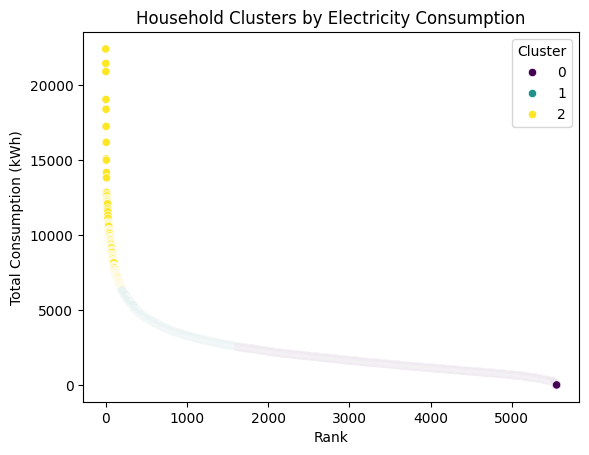

In [110]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features: Total and mean consumption
household_features = household_consumption[['KWH/hh (per half hour) ']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(household_features)

# Fit K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
household_consumption['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze cluster groups
print(household_consumption.groupby('Cluster')['KWH/hh (per half hour) '].mean())

# Visualize clusters
sns.scatterplot(data=household_consumption, x='Rank', y='KWH/hh (per half hour) ', hue='Cluster', palette='viridis')
plt.title('Household Clusters by Electricity Consumption')
plt.xlabel('Rank')
plt.ylabel('Total Consumption (kWh)')
plt.show()


C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_36224\1285751529.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2011, x='Hour', y='KWH/hh (per half hour) ', palette='viridis')


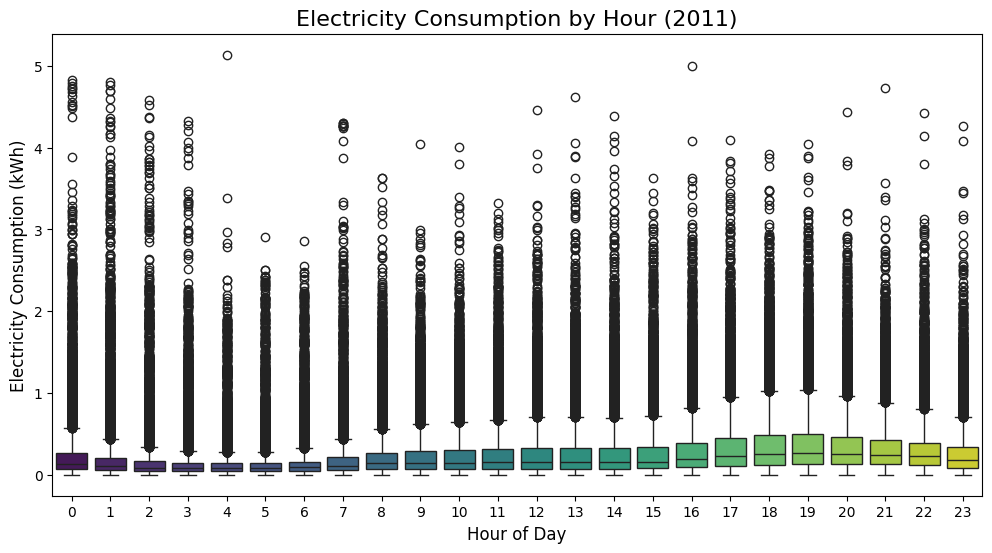

In [31]:
# Lets explore corelations on time based features (hour, weekday, month) for the dataframes 2011, 2013, and 2014 as well
# Derive time features
df_2011['Hour'] = df_2011.index.hour
df_2011['Weekday'] = df_2011.index.weekday
df_2011['Month'] = df_2011.index.month

#plot to see usage by hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2011, x='Hour', y='KWH/hh (per half hour) ', palette='viridis')
plt.title('Electricity Consumption by Hour (2011)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.show()


In [34]:
df_2013.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Month_Year,Hour
0,MAC000002,Std,2014-01-01 00:00:00,0.496,2014-01,0
1,MAC000002,Std,2014-01-01 00:30:00,0.427,2014-01,0
2,MAC000002,Std,2014-01-01 01:00:00,0.469,2014-01,1
3,MAC000002,Std,2014-01-01 01:30:00,0.362,2014-01,1
4,MAC000002,Std,2014-01-01 02:00:00,0.452,2014-01,2


C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_36224\730166147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2013, x='Hour', y='KWH/hh (per half hour) ', palette='viridis')


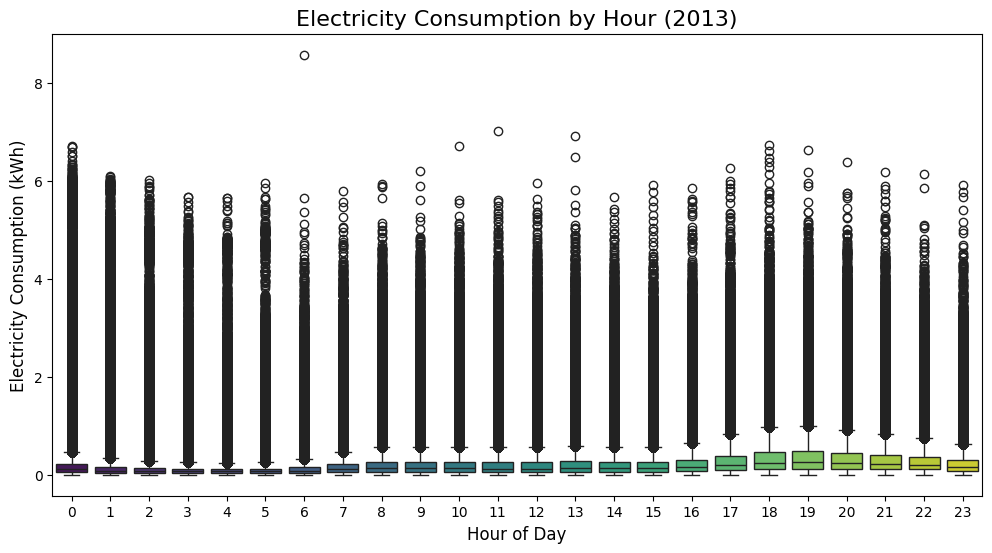

In [37]:
# Ensure the index is of type DatetimeIndex
df_2013['DateTime'] = pd.to_datetime(df_2013['DateTime'])  # Replace 'Datetime' with your actual datetime column name
df_2013.set_index('DateTime', inplace=True)

# Derive time features
df_2013['Hour'] = df_2013.index.hour
df_2013['Weekday'] = df_2013.index.weekday
df_2013['Month'] = df_2013.index.month

# Plot electricity consumption by hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2013, x='Hour', y='KWH/hh (per half hour) ', palette='viridis')
plt.title('Electricity Consumption by Hour (2013)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.show()


C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_36224\3922415760.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2014, x='Hour', y='KWH/hh (per half hour) ', palette='viridis')


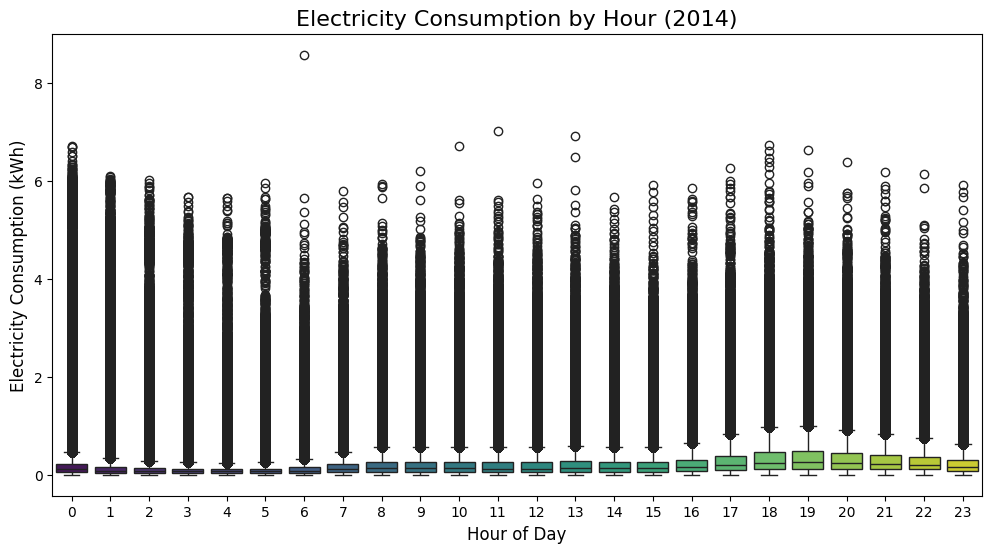

In [40]:
df_2014.reset_index()# Ensure the index is of type DatetimeIndex
df_2014['DateTime'] = pd.to_datetime(df_2014['DateTime'])  # Replace 'Datetime' with your actual datetime column name
df_2014.set_index('DateTime', inplace=True)

# Derive time features
df_2014['Hour'] = df_2014.index.hour
df_2014['Weekday'] = df_2014.index.weekday
df_2014['Month'] = df_2014.index.month

# Plot electricity consumption by hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2014, x='Hour', y='KWH/hh (per half hour) ', palette='viridis')
plt.title('Electricity Consumption by Hour (2014)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.show()


##### Lets proceed with the clustering in other dataframes

In [57]:
# Grouping data by households to get total consumption
household_consumption11 = df_2011.groupby('LCLid')['KWH/hh (per half hour) '].sum().reset_index()

# Adding column for ranking (optional)
household_consumption11 = household_consumption11.sort_values(by='KWH/hh (per half hour) ', ascending=False)
household_consumption11.reset_index(drop=True, inplace=True)
household_consumption11['Rank'] = household_consumption11.index + 1

# Save data to a CSV
household_consumption11.to_csv("household_consumption_2011.csv", index=False)
print("Household consumption data saved successfully!")

# Display the first few rows
household_consumption11.head(10)


Household consumption data saved successfully!


C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_36224\656277773.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  household_consumption11 = df_2011.groupby('LCLid')['KWH/hh (per half hour) '].sum().reset_index()


,LCLid,KWH/hh (per half hour),Rank
0,MAC000153,1439.852001,1
1,MAC000274,1077.939999,2
2,MAC000105,1063.376999,3
3,MAC000252,1027.412000,4
4,MAC000216,1012.878000,5
5,MAC000049,989.307001,6
6,MAC000237,962.486999,7
7,MAC000257,930.581001,8
8,MAC000235,914.164001,9
9,MAC000222,891.226998,10


Cluster
0    118.776474
1    366.664968
2    782.130278
Name: KWH/hh (per half hour) , dtype: float64


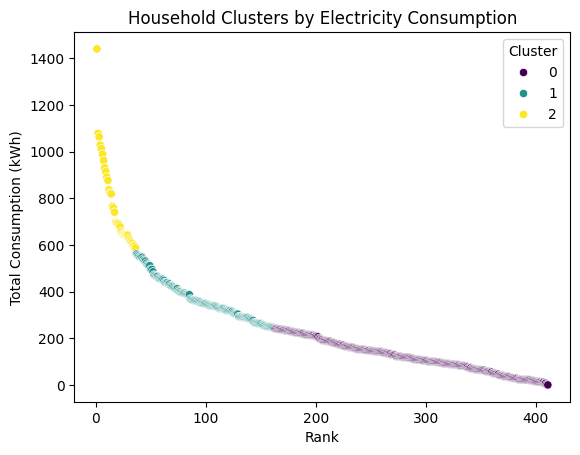

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features: Total and mean consumption
household_features11 = household_consumption11[['KWH/hh (per half hour) ']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(household_features11)

# Fit K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
household_consumption11['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze cluster groups
print(household_consumption11.groupby('Cluster')['KWH/hh (per half hour) '].mean())

# Visualize clusters
sns.scatterplot(data=household_consumption11, x='Rank', y='KWH/hh (per half hour) ', hue='Cluster', palette='viridis')
plt.title('Household Clusters by Electricity Consumption')
plt.xlabel('Rank')
plt.ylabel('Total Consumption (kWh)')
plt.show()


In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features: Total and mean consumption
household_features = household_consumption[['KWH/hh (per half hour) ']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(household_features)

# Fit K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
household_consumption['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze cluster groups
print(household_consumption.groupby('Cluster')['KWH/hh (per half hour) '].mean())

# Visualize clusters
sns.scatterplot(data=household_consumption, x='Rank', y='KWH/hh (per half hour) ', hue='Cluster', palette='viridis')
plt.title('Household Clusters by Electricity Consumption')
plt.xlabel('Rank')
plt.ylabel('Total Consumption (kWh)')
plt.show()


C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_36224\548924432.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  household_consumption13 = df_2013.groupby('LCLid')['KWH/hh (per half hour) '].sum().reset_index()


Household consumption data saved successfully!


,LCLid,KWH/hh (per half hour),Rank
0,MAC004179,7164.327000,1
1,MAC001315,6611.329001,2
2,MAC001145,5385.834996,3
3,MAC002872,5079.765005,4
4,MAC005406,4774.968003,5
5,MAC004216,4260.766995,6
6,MAC004593,4200.401000,7
7,MAC000985,4167.143999,8
8,MAC002213,4088.937998,9
9,MAC002628,4063.365002,10


In [41]:
import matplotlib.pyplot as plt

In [111]:
del scaler
del scaled_features
del kmeans

Cluster
0     2086.442584
1     5262.320881
2    12150.823312
Name: KWH/hh (per half hour) , dtype: float64


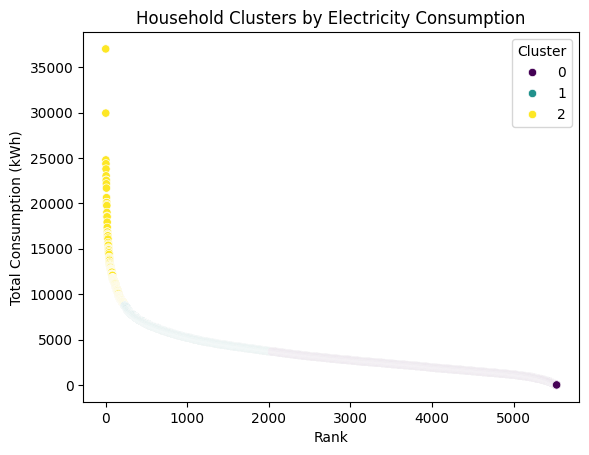

In [112]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features: Total and mean consumption
household_features13 = household_consumption13[['KWH/hh (per half hour) ']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(household_features13)

# Fit K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
household_consumption13['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze cluster groups
print(household_consumption13.groupby('Cluster')['KWH/hh (per half hour) '].mean())

# Visualize clusters
sns.scatterplot(data=household_consumption13, x='Rank', y='KWH/hh (per half hour) ', hue='Cluster', palette='viridis')
plt.title('Household Clusters by Electricity Consumption')
plt.xlabel('Rank')
plt.ylabel('Total Consumption (kWh)')
plt.show()


In [61]:
# Grouping data by households to get total consumption
household_consumption14 = df_2014.groupby('LCLid')['KWH/hh (per half hour) '].sum().reset_index()

# Adding column for ranking (optional)
household_consumption14 = household_consumption14.sort_values(by='KWH/hh (per half hour) ', ascending=False)
household_consumption14.reset_index(drop=True, inplace=True)
household_consumption14['Rank'] = household_consumption14.index + 1

# Save data to a CSV
household_consumption14.to_csv("household_consumption_2014.csv", index=False)
print("Household consumption data saved successfully!")

# Display the first few rows
household_consumption14.head(10)


C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_36224\3338844577.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  household_consumption14 = df_2014.groupby('LCLid')['KWH/hh (per half hour) '].sum().reset_index()


Household consumption data saved successfully!


,LCLid,KWH/hh (per half hour),Rank
0,MAC004179,7164.327000,1
1,MAC001315,6611.329001,2
2,MAC001145,5385.834996,3
3,MAC002872,5079.765005,4
4,MAC005406,4774.968003,5
5,MAC004216,4260.766995,6
6,MAC004593,4200.401000,7
7,MAC000985,4167.143999,8
8,MAC002213,4088.937998,9
9,MAC002628,4063.365002,10


Cluster
0     381.923858
1     989.255822
2    2391.815757
Name: KWH/hh (per half hour) , dtype: float64


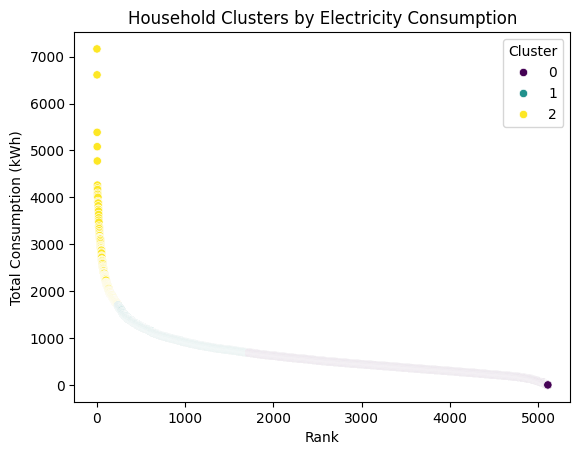

In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features: Total and mean consumption
household_features14 = household_consumption14[['KWH/hh (per half hour) ']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(household_features14)

# Fit K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
household_consumption14['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze cluster groups
print(household_consumption14.groupby('Cluster')['KWH/hh (per half hour) '].mean())

# Visualize clusters
sns.scatterplot(data=household_consumption14, x='Rank', y='KWH/hh (per half hour) ', hue='Cluster', palette='viridis')
plt.title('Household Clusters by Electricity Consumption')
plt.xlabel('Rank')
plt.ylabel('Total Consumption (kWh)')
plt.show()


In [65]:
df_2011.to_feather('2011_data.feather')
df_2012.to_feather('2012_data.feather')
df_2013.to_feather('2013_data.feather')
df_2014.to_feather('2014_data.feather')

### Results of EDA:
#### After detailed Anaysis these are the insights we were able to extract:
#### 1. The Electricity consumption is found to increase it at the end of the year with highest being in the months of Nov, Dec, and the following Januray.
#### 2. Electricity consumption is found to be highest from the hours 07 00 to 17 00 and then dropping again
#### 3. Electricity consumption is found to be highest during the middle of Week with Wednesday-Friday consuming more
#### 4. In Dec-Mar period electricity consumption is observed to be highest
#### 5. Tarriff wise Electricity consumption in Standard is way higher than ToU.
#### 6. Consumption variability is not very high in top households with their consumption being close every half an hour
#### 7. Either ToU or Std average consumption (hourly) is found to gradually increase from 05 00 until 19 00 wheras it stayed kind of steady between 07 00 to 15 00
#### 8. When the clusters were created for low, moderate, and high consuming households, most of them were in low with adequate households also in moderate consuming


### Feature Engineering

In [69]:
!pip install psutil

In [81]:
import psutil

# Get memory details
memory = psutil.virtual_memory()

print(f"Total Memory: {memory.total / (1024**3):.2f} GB")     # Total memory in GB
print(f"Used Memory: {memory.used / (1024**3):.2f} GB")       # Used memory in GB
print(f"Available Memory: {memory.available / (1024**3):.2f} GB")  # Available memory in GB
print(f"Memory Usage: {memory.percent}%")                     # Memory usage percentage

Total Memory: 63.43 GB
Used Memory: 34.44 GB
Available Memory: 29.00 GB
Memory Usage: 54.3%


In [71]:
# Merging household_consumption clusters with my dataframes to group households based on their consumption pattern

df_2011 = df_2011.merge(household_consumption11[['LCLid', 'Rank']], 
                        on='LCLid', how='left')


In [113]:
df_2012 = df_2012.merge(household_consumption[['LCLid', 'Rank']], 
                        on='LCLid', how='left')


In [119]:
del df_2013

In [121]:
df_2012.to_feather('df_2012.feather')

In [114]:
df_2013 = df_2013.merge(household_consumption13[['LCLid', 'Rank']], 
                        on='LCLid', how='left')


MemoryError: Unable to allocate 710. MiB for an array with shape (1, 93087798) and data type float64

In [76]:
df_2014 = df_2014.merge(household_consumption14[['LCLid', 'Rank']], 
                        on='LCLid', how='left')


In [48]:
df_2012.to_feather('df_2012.feather')
df_2013.to_feather('df_2013.feather')

In [80]:
df_2014.head()

,DateTime,LCLid,stdorToU,KWH/hh (per half hour),Month_Year,Hour,Weekday,Month,Rank
0,2014-01-01 00:00:00,MAC000002,Std,0.496,2014-01,0,2,1,1025
1,2014-01-01 00:30:00,MAC000002,Std,0.427,2014-01,0,2,1,1025
2,2014-01-01 01:00:00,MAC000002,Std,0.469,2014-01,1,2,1,1025
3,2014-01-01 01:30:00,MAC000002,Std,0.362,2014-01,1,2,1,1025
4,2014-01-01 02:00:00,MAC000002,Std,0.452,2014-01,2,2,1,1025


In [82]:
df_2011.to_feather("df_2011.feather")
df_2012.to_feather("df_2012.feather")
df_2013.to_feather("df_2013.feather")
df_2014.to_feather("df_2014.feather")

In [120]:
import psutil

# Get memory details
memory = psutil.virtual_memory()

print(f"Total Memory: {memory.total / (1024**3):.2f} GB")     # Total memory in GB
print(f"Used Memory: {memory.used / (1024**3):.2f} GB")       # Used memory in GB
print(f"Available Memory: {memory.available / (1024**3):.2f} GB")  # Available memory in GB
print(f"Memory Usage: {memory.percent}%")

Total Memory: 63.43 GB
Used Memory: 60.36 GB
Available Memory: 3.07 GB
Memory Usage: 95.2%


In [6]:
# creating a Weekend or Season variable can enhance the prediction of consumption:

df_2011['Weekend'] = df_2011['Weekday'].apply(lambda x: 1 if x in [5, 6] else 0)
df_2011['Season'] = df_2011['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Summer')

In [122]:
df_2012['Weekend'] = df_2012['Weekday'].apply(lambda x: 1 if x in [5, 6] else 0)
df_2012['Season'] = df_2012['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Summer')

In [54]:
df_2013['Weekend'] = df_2013['Weekday'].apply(lambda x: 1 if x in [5, 6] else 0)
df_2013['Season'] = df_2013['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Summer')

In [9]:
df_2014['Weekend'] = df_2014['Weekday'].apply(lambda x: 1 if x in [5, 6] else 0)
df_2014['Season'] = df_2014['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Summer')

In [126]:
df_2012.head()

,LCLid,stdorToU,KWH/hh (per half hour),Month_Year,Hour,Weekday,Month,Rank_x,Weekend,Season,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_10,Rolling_Std_3,Rolling_Std_10,Rank_y
0,MAC000002,Std,0.0,2012-10,3,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4359
1,MAC000002,Std,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4359
2,MAC000002,Std,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359
3,MAC000002,Std,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359
4,MAC000002,Std,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359


In [55]:
df_2013.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Month_Year,Hour,Weekday,Month,Rank,Weekend,Season
0,MAC000002,Std,2013-01-01 00:00:00,0.219,2013-01,0,1,1,1600,0,Winter
1,MAC000002,Std,2013-01-01 00:30:00,0.241,2013-01,0,1,1,1600,0,Winter
2,MAC000002,Std,2013-01-01 01:00:00,0.191,2013-01,1,1,1,1600,0,Winter
3,MAC000002,Std,2013-01-01 01:30:00,0.235,2013-01,1,1,1,1600,0,Winter
4,MAC000002,Std,2013-01-01 02:00:00,0.182,2013-01,2,1,1,1600,0,Winter


In [15]:
df_2014.head()

,DateTime,LCLid,stdorToU,KWH/hh (per half hour),Month_Year,Hour,Weekday,Month,Rank,Weekend,Season
0,2014-01-01 00:00:00,MAC000002,Std,0.496,2014-01,0,2,1,1025,0,Winter
1,2014-01-01 00:30:00,MAC000002,Std,0.427,2014-01,0,2,1,1025,0,Winter
2,2014-01-01 01:00:00,MAC000002,Std,0.469,2014-01,1,2,1,1025,0,Winter
3,2014-01-01 01:30:00,MAC000002,Std,0.362,2014-01,1,2,1,1025,0,Winter
4,2014-01-01 02:00:00,MAC000002,Std,0.452,2014-01,2,2,1,1025,0,Winter


In [129]:
df_2012 = df_2012.drop(columns=['Lag_1', 'Lag_2', 'Lag_3'])

In [16]:
# Lagged Features (Previous consumption values)
# These are critical for any time-series prediction task. Electricity consumption is usually heavily dependent on previous consumption. 

# Creating lag features
df_2011['Lag_1'] = df_2011['KWH/hh (per half hour) '].shift(1)
df_2011['Lag_2'] = df_2011['KWH/hh (per half hour) '].shift(2)
df_2011['Lag_3'] = df_2011['KWH/hh (per half hour) '].shift(3)

In [131]:
df_2012['Lag_1'] = df_2012['KWH/hh (per half hour) '].shift(1)
df_2012['Lag_2'] = df_2012['KWH/hh (per half hour) '].shift(2)
df_2012['Lag_3'] = df_2012['KWH/hh (per half hour) '].shift(3)

In [57]:
df_2013['Lag_1'] = df_2013['KWH/hh (per half hour) '].shift(1)
df_2013['Lag_2'] = df_2013['KWH/hh (per half hour) '].shift(2)
df_2013['Lag_3'] = df_2013['KWH/hh (per half hour) '].shift(3)

In [19]:
df_2014['Lag_1'] = df_2014['KWH/hh (per half hour) '].shift(1)
df_2014['Lag_2'] = df_2014['KWH/hh (per half hour) '].shift(2)
df_2014['Lag_3'] = df_2014['KWH/hh (per half hour) '].shift(3)

In [31]:
df_2011 = df_2011.dropna(subset=['Lag_1', 'Lag_2', 'Lag_3'])


In [ ]:
df_2012.to_feather('data_2012.feather')

In [34]:
df_2012 = df_2012.dropna(subset=['Lag_1', 'Lag_2', 'Lag_3'])
df_2013 = df_2013.dropna(subset=['Lag_1', 'Lag_2', 'Lag_3'])
df_2014 = df_2014.dropna(subset=['Lag_1', 'Lag_2', 'Lag_3'])

In [37]:
# Rolling Means: (For smoothing consumption data over time and capturing trends)

df_2011['Rolling_Mean_3'] = df_2011['KWH/hh (per half hour) '].rolling(window=3).mean()
df_2011['Rolling_Mean_10'] = df_2011['KWH/hh (per half hour) '].rolling(window=10).mean()


C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_37044\1159807614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['Rolling_Mean_3'] = df_2011['KWH/hh (per half hour) '].rolling(window=3).mean()
C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_37044\1159807614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['Rolling_Mean_10'] = df_2011['KWH/hh (per half hour) '].rolling(window=10).mean()


In [6]:
df_2012.head()

,LCLid,stdorToU,KWH/hh (per half hour),Month_Year,Hour,Weekday,Month,Rank_x,Weekend,Season,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_10,Rolling_Std_3,Rolling_Std_10,Rank_y
0,MAC000002,Std,0.0,2012-10,3,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4359
1,MAC000002,Std,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4359
2,MAC000002,Std,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359
3,MAC000002,Std,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359
4,MAC000002,Std,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359


In [78]:
df_2012['Rolling_Mean_3'] = df_2012['KWH/hh (per half hour) '].rolling(window=3).mean()
df_2012['Rolling_Mean_10'] = df_2012['KWH/hh (per half hour) '].rolling(window=10).mean()


In [79]:
df_2013['Rolling_Mean_3'] = df_2013['KWH/hh (per half hour) '].rolling(window=3).mean()
df_2013['Rolling_Mean_10'] = df_2013['KWH/hh (per half hour) '].rolling(window=10).mean()


In [43]:
df_2014['Rolling_Mean_3'] = df_2014['KWH/hh (per half hour) '].rolling(window=3).mean()
df_2014['Rolling_Mean_10'] = df_2014['KWH/hh (per half hour) '].rolling(window=10).mean()


C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_37044\852916603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Rolling_Mean_3'] = df_2014['KWH/hh (per half hour) '].rolling(window=3).mean()
C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_37044\852916603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Rolling_Mean_10'] = df_2014['KWH/hh (per half hour) '].rolling(window=10).mean()


In [44]:
#Rolling Standard Deviation: (For capturing variability in electricity usage)
df_2011['Rolling_Std_3'] = df_2011['KWH/hh (per half hour) '].rolling(window=3).std()
df_2011['Rolling_Std_10'] = df_2011['KWH/hh (per half hour) '].rolling(window=10).std()


C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_37044\3080903825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['Rolling_Std_3'] = df_2011['KWH/hh (per half hour) '].rolling(window=3).std()
C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_37044\3080903825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['Rolling_Std_10'] = df_2011['KWH/hh (per half hour) '].rolling(window=10).std()


In [19]:
df_2012 = df_2012.drop(columns=['Rolling_Std_3', 'Rolling_Std_10'])

In [26]:
df_2012['Rolling_Std_3'] = df_2012['Rolling_Std_3'].interpolate(method='linear')
df_2012['Rolling_Std_10'] = df_2012['Rolling_Std_10'].interpolate(method='linear')

In [20]:
df_2012['Rolling_Std_3'] = df_2012['KWH/hh (per half hour) '].rolling(window=3).std()
df_2012['Rolling_Std_10'] = df_2012['KWH/hh (per half hour) '].rolling(window=10).std()

In [85]:
df_2013['Rolling_Std_3'] = df_2013['KWH/hh (per half hour) '].rolling(window=3).std()
df_2013['Rolling_Std_10'] = df_2013['KWH/hh (per half hour) '].rolling(window=10).std()

In [47]:
df_2014['Rolling_Std_3'] = df_2014['KWH/hh (per half hour) '].rolling(window=3).std()
df_2014['Rolling_Std_10'] = df_2014['KWH/hh (per half hour) '].rolling(window=10).std()

C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_37044\909522448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Rolling_Std_3'] = df_2014['KWH/hh (per half hour) '].rolling(window=3).std()
C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_37044\909522448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Rolling_Std_10'] = df_2014['KWH/hh (per half hour) '].rolling(window=10).std()


In [16]:
# Aggregating over Week or Month to fill missing values
df_2012['Rolling_Std_3'] = df_2012.groupby('Month')['Rolling_Std_3'].transform(lambda x: x.fillna(x.mean()))
df_2012['Rolling_Std_10'] = df_2012.groupby('Month')['Rolling_Std_10'].transform(lambda x: x.fillna(x.mean()))

In [86]:
df_2012.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Month_Year,Hour,Weekday,Month,Rank,Weekend,Season,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_10,Rolling_Std_3,Rolling_Std_10
6,MAC000002,Std,2012-10-12 03:30:00,0.0,2012-10,3,4,10,4359,0,Summer,0.0,0.0,0.0,NaN,NaN,NaN,NaN
7,MAC000002,Std,2012-10-12 04:00:00,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,NaN,NaN,NaN,NaN
8,MAC000002,Std,2012-10-12 04:30:00,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,NaN,0.0,NaN
9,MAC000002,Std,2012-10-12 05:00:00,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,NaN,0.0,NaN
10,MAC000002,Std,2012-10-12 05:30:00,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,NaN,0.0,NaN


In [49]:
df_2011.to_feather("df_2011.feather")
df_2012.to_feather("df_2012.feather")
df_2013.to_feather("df_2013.feather")
df_2014.to_feather("df_2014.feather")

In [2]:
import pandas as pd
df_2011=pd.read_feather('df_2011.feather')
df_2012=pd.read_feather('df_2012.feather')
df_2013=pd.read_feather('df_2013.feather')
df_2014=pd.read_feather('df_2014.feather')

In [27]:
df_2012.to_feather('df_2012.feather')

In [4]:
import pandas as pd
df_2012=pd.read_feather('df_2012.feather')
df_2012.head(10)

,LCLid,stdorToU,KWH/hh (per half hour),Month_Year,Hour,Weekday,Month,Rank_x,Weekend,Season,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_10,Rank_y,DateTime,Rolling_Std_3,Rolling_Std_10
0,MAC000002,Std,0.0,2012-10,3,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 00:30:00.0000000,NaN,NaN
1,MAC000002,Std,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 01:00:00.0000000,NaN,NaN
2,MAC000002,Std,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 01:30:00.0000000,0.0,NaN
3,MAC000002,Std,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 02:00:00.0000000,0.0,NaN
4,MAC000002,Std,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 02:30:00.0000000,0.0,NaN
5,MAC000002,Std,0.0,2012-10,6,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 03:00:00.0000000,0.0,NaN
6,MAC000002,Std,0.0,2012-10,6,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 03:30:00.0000000,0.0,NaN
7,MAC000002,Std,0.0,2012-10,7,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 04:00:00.0000000,0.0,NaN
8,MAC000002,Std,0.0,2012-10,7,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 04:30:00.0000000,0.0,NaN
9,MAC000002,Std,0.0,2012-10,8,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 05:00:00.0000000,0.0,0.0


In [5]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60393414 entries, 0 to 60393413
Data columns (total 19 columns):
 #   Column                   Dtype    
---  ------                   -----    
 0   LCLid                    object   
 1   stdorToU                 category 
 2   KWH/hh (per half hour)   float64  
 3   Month_Year               period[M]
 4   Hour                     int32    
 5   Weekday                  int32    
 6   Month                    int32    
 7   Rank_x                   int64    
 8   Weekend                  int64    
 9   Season                   object   
 10  Lag_1                    float64  
 11  Lag_2                    float64  
 12  Lag_3                    float64  
 13  Rolling_Mean_3           float64  
 14  Rolling_Mean_10          float64  
 15  Rank_y                   int64    
 16  DateTime                 object   
 17  Rolling_Std_3            float64  
 18  Rolling_Std_10           float64  
dtypes: category(1), float64(8), int32(3), in

In [16]:
# Assuming backup_df is your backup dataframe
df_2012['DateTime'] = or_df_2012['DateTime']
df_2012.head(10)

,LCLid,stdorToU,KWH/hh (per half hour),Month_Year,Hour,Weekday,Month,Rank_x,Weekend,Season,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_10,Rolling_Std_3,Rolling_Std_10,Rank_y,DateTime
0,MAC000002,Std,0.0,2012-10,3,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4359,2012-10-12 00:30:00.0000000
1,MAC000002,Std,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4359,2012-10-12 01:00:00.0000000
2,MAC000002,Std,0.0,2012-10,4,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359,2012-10-12 01:30:00.0000000
3,MAC000002,Std,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359,2012-10-12 02:00:00.0000000
4,MAC000002,Std,0.0,2012-10,5,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359,2012-10-12 02:30:00.0000000
5,MAC000002,Std,0.0,2012-10,6,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359,2012-10-12 03:00:00.0000000
6,MAC000002,Std,0.0,2012-10,6,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359,2012-10-12 03:30:00.0000000
7,MAC000002,Std,0.0,2012-10,7,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359,2012-10-12 04:00:00.0000000
8,MAC000002,Std,0.0,2012-10,7,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359,2012-10-12 04:30:00.0000000
9,MAC000002,Std,0.0,2012-10,8,4,10,4359,0,Summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 05:00:00.0000000


In [17]:
df_2012.isna().sum()

LCLid                      0
stdorToU                   0
KWH/hh (per half hour)     0
Hour                       0
Weekday                    0
Month                      0
Rank_x                     0
Weekend                    0
Lag_1                      0
Lag_2                      0
Lag_3                      0
Rolling_Mean_3             0
Rolling_Mean_10            0
Rank_y                     0
DateTime                   0
Rolling_Std_3              0
Rolling_Std_10             0
Season_Summer              0
Season_Winter              0
dtype: int64

In [88]:
df_2013.to_feather('df_2013.feather')

In [9]:
# Forward-fill missing values in lag features for each dataframe
dataframes = [df_2011, df_2012, df_2013, df_2014]
for df in dataframes:
    Rolling_features = [col for col in df.columns if col.startswith("Rolling_Mean_")]
    df[Rolling_features] = df[Rolling_features].fillna(method='ffill')
    # If some missing values still persist due to continuous NaNs at the start, fill them with 0 or other strategy
    df[Rolling_features] = df[Rolling_features].fillna(0)

# Verifying if NaN values are removed
for year, df in zip([2011, 2012, 2013, 2014], dataframes):
    print(f"NaN count after forward-filling for df_{year}: {df.isna().sum().sum()}")

C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_7596\1791983451.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[Rolling_features] = df[Rolling_features].fillna(method='ffill')
C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_7596\1791983451.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[Rolling_features] = df[Rolling_features].fillna(method='ffill')
C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_7596\1791983451.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[Rolling_features] = df[Rolling_features].fillna(method='ffill')
C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_7596\1791983451.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

NaN count after forward-filling for df_2011: 11
NaN count after forward-filling for df_2012: 11
NaN count after forward-filling for df_2013: 11
NaN count after forward-filling for df_2014: 11


In [15]:
# Forward-fill missing values in Std features for each dataframe
for df in dataframes:
    RollingStd_features = [col for col in df.columns if col.startswith("Rolling_Std_")]
    df[RollingStd_features] = df[RollingStd_features].fillna(method='ffill')
    # If some missing values still persist due to continuous NaNs at the start, fill them with 0 or other strategy
    df[RollingStd_features] = df[RollingStd_features].fillna(0)

# Verifying if NaN values are removed
for year, df in zip([2011, 2012, 2013, 2014], dataframes):
    print(f"NaN count after forward-filling for df_{year}: {df.isna().sum().sum()}")

C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_7596\3342791492.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[RollingStd_features] = df[RollingStd_features].fillna(method='ffill')
C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_7596\3342791492.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[RollingStd_features] = df[RollingStd_features].fillna(method='ffill')
C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_7596\3342791492.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[RollingStd_features] = df[RollingStd_features].fillna(method='ffill')
C:\Users\JahangirBaigAVK\AppData\Local\Temp\ipykernel_7596\3342791492.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and

NaN count after forward-filling for df_2011: 0
NaN count after forward-filling for df_2012: 0
NaN count after forward-filling for df_2013: 0
NaN count after forward-filling for df_2014: 0


In [2]:

import gc
gc.collect()

177

In [20]:
df_2012.to_feather('df_2012.feather')

In [3]:
import psutil
memory_info = psutil.virtual_memory()
print(f"Used Memory: {memory_info.used / 1e9:.2f} GB")
print(f"Available Memory: {memory_info.available / 1e9:.2f} GB")
print(f"Memory Usage: {memory_info.percent}%")


Used Memory: 16.95 GB
Available Memory: 51.16 GB
Memory Usage: 24.9%


In [27]:
df_2011.to_feather("df_2011.feather")
df_2012.to_feather("df_2012.feather")
df_2013.to_feather("df_2013.feather")
df_2014.to_feather("df_2014.feather")

In [115]:
df_2013['DateTime']=pd.to_datetime(df_2013['DateTime'])
print(df_2013['DateTime'].dt.year.unique())

[2013]


In [7]:
df_2012['DateTime']=pd.to_datetime(df_2012['DateTime'])
print(df_2012['DateTime'].dt.year.unique())

[2012]


In [6]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60393414 entries, 0 to 60393413
Data columns (total 19 columns):
 #   Column                   Dtype    
---  ------                   -----    
 0   LCLid                    object   
 1   stdorToU                 category 
 2   KWH/hh (per half hour)   float64  
 3   Month_Year               period[M]
 4   Hour                     int32    
 5   Weekday                  int32    
 6   Month                    int32    
 7   Rank_x                   int64    
 8   Weekend                  int64    
 9   Season                   object   
 10  Lag_1                    float64  
 11  Lag_2                    float64  
 12  Lag_3                    float64  
 13  Rolling_Mean_3           float64  
 14  Rolling_Mean_10          float64  
 15  Rank_y                   int64    
 16  DateTime                 object   
 17  Rolling_Std_3            float64  
 18  Rolling_Std_10           float64  
dtypes: category(1), float64(8), int32(3), in

In [8]:
# lets encode the non numeric features

season_dummies = pd.get_dummies(df_2012['Season'], prefix='Season')
df_2012 = pd.concat([df_2012, season_dummies], axis=1)
df_2012.drop('Season', axis=1, inplace=True)


The purpose of using one hot encoding for season is to avoid bias and there is no inherent order or hierarchy in data
Label encoding would be used for columns LCLid and stdorToU to stop creating multiple columns based on unique ids as there are several unique households.

In [4]:
!pip install scikit-learn

In [9]:
from sklearn.preprocessing import LabelEncoder

le_lclid = LabelEncoder()
df_2012['LCLid'] = le_lclid.fit_transform(df_2012['LCLid'])

le_stdortou = LabelEncoder()
df_2012['stdorToU'] = le_stdortou.fit_transform(df_2012['stdorToU'])


In [10]:
# Drop the Month_Year column from the dataframe
df_2012 = df_2012.drop(columns=['Month_Year'])

# Verify the column is removed
df_2012.head()

,LCLid,stdorToU,KWH/hh (per half hour),Hour,Weekday,Month,Rank_x,Weekend,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_10,Rank_y,DateTime,Rolling_Std_3,Rolling_Std_10,Season_Summer,Season_Winter
0,0,0,0.0,3,4,10,4359,0,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 00:30:00,NaN,NaN,True,False
1,0,0,0.0,4,4,10,4359,0,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 01:00:00,NaN,NaN,True,False
2,0,0,0.0,4,4,10,4359,0,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 01:30:00,0.0,NaN,True,False
3,0,0,0.0,5,4,10,4359,0,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 02:00:00,0.0,NaN,True,False
4,0,0,0.0,5,4,10,4359,0,0.0,0.0,0.0,0.0,0.0,4359,2012-10-12 02:30:00,0.0,NaN,True,False


In [18]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60393414 entries, 0 to 60393413
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   LCLid                    int64         
 1   stdorToU                 int64         
 2   KWH/hh (per half hour)   float64       
 3   Hour                     int32         
 4   Weekday                  int32         
 5   Month                    int32         
 6   Rank_x                   int64         
 7   Weekend                  int64         
 8   Lag_1                    float64       
 9   Lag_2                    float64       
 10  Lag_3                    float64       
 11  Rolling_Mean_3           float64       
 12  Rolling_Mean_10          float64       
 13  Rank_y                   int64         
 14  DateTime                 datetime64[ns]
 15  Rolling_Std_3            float64       
 16  Rolling_Std_10           float64       
 17  Season_Summer            

In [12]:
# Convert 'bool' columns to int
df_2012['Season_Summer'] = df_2012['Season_Summer'].astype(int)
df_2012['Season_Winter'] = df_2012['Season_Winter'].astype(int)

In [17]:
# Target Variable
target = 'KWH/hh (per half hour) '

# Features
features = [col for col in df_2012.columns]                                                                                                                                                                                                                                                   

# Verify
print("Features:", features)
print("Target:", target)

Features: ['LCLid', 'stdorToU', 'Weekday', 'Month', 'Hour', 'Rank', 'Weekend', 'Lag_1', 'Lag_2', 'Lag_3', 'Rolling_Mean_3', 'Rolling_Mean_10', 'Rolling_Std_3', 'Rolling_Std_10', 'Season_Summer', 'Season_Winter']
Target: KWH/hh (per half hour) 


In [14]:
# Splitting the data in 70 30 ratio
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df_2012, test_size=0.3, shuffle=False)

print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)


Training data shape: (42275389, 19)
Testing data shape: (18118025, 19)


In [20]:
import psutil
memory_info = psutil.virtual_memory()
print(f"Used Memory: {memory_info.used / 1e9:.2f} GB")
print(f"Available Memory: {memory_info.available / 1e9:.2f} GB")
print(f"Memory Usage: {memory_info.percent}%")

Used Memory: 44.14 GB
Available Memory: 23.97 GB
Memory Usage: 64.8%


In [19]:
non_matching_rows = (df_2012['Rank_x'] != df_2012['Rank_y']).sum()
print(f"Number of non-matching rows: {non_matching_rows}")


Number of non-matching rows: 28213316


In [21]:
# Min Max Scaler to scale the numeric columns in a range for effective model training

from sklearn.preprocessing import MinMaxScaler

# Numeric columns that you need to scale
numeric_columns = ['KWH/hh (per half hour) ', 'Weekday', 'Month', 'Hour', 
                   'Lag_1', 'Lag_2', 'Lag_3', 'Rolling_Mean_3', 'Rolling_Mean_10', 
                   'Rolling_Std_3', 'Rolling_Std_10']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling only on numeric features
df_2012[numeric_columns] = scaler.fit_transform(df_2012[numeric_columns])

# Verifying the results
print(df_2012[numeric_columns].head())


   KWH/hh (per half hour)    Weekday     Month      Hour  Lag_1  Lag_2  Lag_3  \
0                      0.0  0.666667  0.818182  0.130435    0.0    0.0    0.0   
1                      0.0  0.666667  0.818182  0.173913    0.0    0.0    0.0   
2                      0.0  0.666667  0.818182  0.173913    0.0    0.0    0.0   
3                      0.0  0.666667  0.818182  0.217391    0.0    0.0    0.0   
4                      0.0  0.666667  0.818182  0.217391    0.0    0.0    0.0   

   Rolling_Mean_3  Rolling_Mean_10  Rolling_Std_3  Rolling_Std_10  
0             0.0              0.0       0.015388        0.031839  
1             0.0              0.0       0.015388        0.031839  
2             0.0              0.0       0.000000        0.031839  
3             0.0              0.0       0.000000        0.031839  
4             0.0              0.0       0.000000        0.031839  


In [26]:
df_2012.head()

,LCLid,stdorToU,KWH/hh (per half hour),Hour,Weekday,Month,Weekend,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_10,DateTime,Rolling_Std_3,Rolling_Std_10,Season_Summer,Season_Winter
0,0,0,0.0,0.130435,0.666667,0.818182,0,0.0,0.0,0.0,0.0,0.0,2012-10-12 00:30:00,0.015388,0.031839,1,0
1,0,0,0.0,0.173913,0.666667,0.818182,0,0.0,0.0,0.0,0.0,0.0,2012-10-12 01:00:00,0.015388,0.031839,1,0
2,0,0,0.0,0.173913,0.666667,0.818182,0,0.0,0.0,0.0,0.0,0.0,2012-10-12 01:30:00,0.000000,0.031839,1,0
3,0,0,0.0,0.217391,0.666667,0.818182,0,0.0,0.0,0.0,0.0,0.0,2012-10-12 02:00:00,0.000000,0.031839,1,0
4,0,0,0.0,0.217391,0.666667,0.818182,0,0.0,0.0,0.0,0.0,0.0,2012-10-12 02:30:00,0.000000,0.031839,1,0


In [29]:
df_2012.to_feather('df_2012.feather')

In [24]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --------------- ------------------------ 5.2/13.3 MB 26.1 MB/s eta 0:00:01
   --------------------------------- ------ 11.0/13.3 MB 27.2 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------------------------- ---- 1.0/1.2 MB 24.7 MB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.2 MB 24.7 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 1.6 MB/s eta 0:00:00


In [29]:
!pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   -------- ------------------------------- 3.9/19.1 MB 19.9 MB/s eta 0:00:01
   ------------------ --------------------- 8.9/19.1 MB 22.1 MB/s eta 0:00:01
   --------------------------- ------------ 13.1/19.1 MB 21.7 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.1 MB 23.1 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.1 MB 23.1 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 15.7 MB/s eta 0:00:00


In [31]:
df_2012.head()

,DateTime,LCLid,stdorToU,KWH/hh (per half hour),Weekday,Month,Hour,Rank,Weekend,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_10,Rolling_Std_3,Rolling_Std_10,Season_Summer,Season_Winter
3,2013-01-01 01:30:00,0,0,0.021838,0.166667,0.0,0.043478,0.289307,0.0,0.017749,0.022396,0.020351,0.000000,0.0,0.000000,0.0,0,1
4,2013-01-01 02:00:00,0,0,0.016913,0.166667,0.0,0.086957,0.289307,0.0,0.021838,0.017749,0.022396,0.000000,0.0,0.000000,0.0,0,1
5,2013-01-01 02:30:00,0,0,0.021281,0.166667,0.0,0.086957,0.289307,0.0,0.016913,0.021838,0.017749,0.020713,0.0,0.005588,0.0,0,1
6,2013-01-01 03:00:00,0,0,0.018028,0.166667,0.0,0.130435,0.289307,0.0,0.021281,0.016913,0.021838,0.019398,0.0,0.004702,0.0,0,1
7,2013-01-01 03:30:00,0,0,0.018679,0.166667,0.0,0.130435,0.289307,0.0,0.018028,0.021281,0.016913,0.020008,0.0,0.003566,0.0,0,1


In [22]:
import gc
gc.collect()  # Forces garbage collection to release unused memory


0

In [28]:
df_2012.shape

(60393414, 17)

In [23]:
import prophet
print(prophet.__version__)

1.1.6


In [14]:
import sklearn
print(sklearn.__version__)

1.6.0


In [3]:
import pandas as pd
df_2012=pd.read_feather('df_2012.feather')

In [22]:
selected_household=df_2012['LCLid'].unique())

5552


In [23]:
df_2012.head()

,LCLid,stdorToU,KWH/hh (per half hour),Hour,Weekday,Month,Weekend,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_10,DateTime,Rolling_Std_3,Rolling_Std_10,Season_Summer,Season_Winter
0,0,0,0.0,0.130435,0.666667,0.818182,0,0.0,0.0,0.0,0.0,0.0,2012-10-12 00:30:00,0.015388,0.031839,1,0
1,0,0,0.0,0.173913,0.666667,0.818182,0,0.0,0.0,0.0,0.0,0.0,2012-10-12 01:00:00,0.015388,0.031839,1,0
2,0,0,0.0,0.173913,0.666667,0.818182,0,0.0,0.0,0.0,0.0,0.0,2012-10-12 01:30:00,0.000000,0.031839,1,0
3,0,0,0.0,0.217391,0.666667,0.818182,0,0.0,0.0,0.0,0.0,0.0,2012-10-12 02:00:00,0.000000,0.031839,1,0
4,0,0,0.0,0.217391,0.666667,0.818182,0,0.0,0.0,0.0,0.0,0.0,2012-10-12 02:30:00,0.000000,0.031839,1,0


In [92]:
df_2013=pd.read_feather('2013_data.feather')
df_2013.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2013-01-01 00:00:00.0000000,0.219
1,MAC000002,Std,2013-01-01 00:30:00.0000000,0.241
2,MAC000002,Std,2013-01-01 01:00:00.0000000,0.191
3,MAC000002,Std,2013-01-01 01:30:00.0000000,0.235
4,MAC000002,Std,2013-01-01 02:00:00.0000000,0.182


In [75]:
# Get unique years
unique_years = df_2011['DateTime'].dt.year.unique()

# Display the unique years
print(unique_years)

[2011]
